### Библиотеки

In [191]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sts
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Данные

In [192]:
df = pd.read_csv('edu_text_recall_data.csv')
df

,recall_score,higher_edu,far_from_uni,adhd,low_focus,text_complexity,age,reads_often,not_tired
0,49.901153,0,0,0,1,79.875433,33,1,0
1,45.694394,0,1,0,0,57.942059,27,0,0
2,43.077342,0,0,0,0,35.177121,25,0,1
3,46.803460,0,0,0,0,31.642157,27,1,1
4,61.015157,0,1,0,0,78.800967,38,1,1
...,...,...,...,...,...,...,...,...,...
4995,54.535646,1,0,0,1,52.862177,22,1,0
4996,68.945680,1,0,0,0,70.281624,24,0,1
4997,57.976581,1,1,0,0,54.913072,31,0,0
4998,38.935675,0,0,0,1,39.401695,32,0,1


In [193]:
unavailable_info = pd.read_csv('unavailable_info.csv')
unavailable_info

,recall_score_1,recall_score_0,higher_edu_1,higher_edu_0,ind_type
0,66.706819,49.901153,0,0,Never taker
1,60.711175,45.694394,0,0,Never taker
2,57.279406,43.077342,0,0,Never taker
3,58.763564,46.803460,0,0,Never taker
4,78.533656,61.015157,0,0,Never taker
...,...,...,...,...,...
4995,54.535646,42.707954,0,1,Denier
4996,68.945680,51.649836,1,1,Always taker
4997,57.976581,43.887605,1,1,Always taker
4998,51.290168,38.935675,0,0,Never taker


### 1. Математически запишите и содержательно проинтерпретируйте потенциаль-ные исходы целевой переменной. Объясните, как они связаны с наблюдаемымизначениями целевой переменной.

#### Потенциальные исходы

Мы исследуем влияние высшего образования (higher_edu) на полученный recall_score. recall_score кратко назовем $R$, higher_edu - $H$

Определим потенциальные исходы для целевой переменной:

- $R_{1i} = 1$, если $H_i = 1$, то есть если индивид получил высшее (или еще более высокую степерь) образование

- $R_{0i} = 0$, если $H_i = 0$, то есть если индивид не получил высшего (или еще выше) образования


#### Связь с наблюдаемыми значениями

В реальности для одного человека нельзя наблюдать оба значения $R_{1i}$ и $R_{0i}$ - только одно, так как параллельных реальностей нет и у нас нет к ним доступа.

Тогда фактически Recall_score можно записать так:

$$R_i = R_{1i} * H_{i} + R_{0i} * (1 - H_{i})$$

- Если $H_{i} = 1$, то $R_{i} = R_{1i}$. 
- Если $H_{i} = 0$, то $R_{i} = R_{0i}$. 

### 2. Используя симулированные вами, но недоступные в реальных данных потенци- альные исходы (гипотетические значения), получите оценки среднего эффекта воздействия, условных средних эффектов воздействия и локального средне- го эффекта воздействия. Для ATE и LATE результаты представьте в форме таблицы, а для CATE постройте гистограмму или ядерную оценку функции плотности. Проинтерпретируйте полученные значения.

Примечание: для получения очень точных оценок эффектов воздействия с
помощью потенциальных исходов (гипотетических переменных) можно сперва
симулировать очень большого число наблюдений, например, несколько миллио-
нов. Затем, для ускорения вычислений, для оценивания эффектов воздействия
с помощью наблюдемых значений можно использовать часть выборки, напри-
мер, десять тысяч наблюдений.

#### Истинная оценка ATE

$$ATE = E[R_{1i}] - E[R_{0i}]$$

In [194]:
ATE_true = (unavailable_info['recall_score_1'] - unavailable_info['recall_score_0']).mean()

print(f'Истинная оценка ATE: {ATE_true:.2f}')

Истинная оценка ATE: 15.30


#### Истинная оценка LATE

$$LATE = E[R_{1i} | H_{1i} > H_{0i}] - E[R_{0i} | H_{1i} > H_{0i}]$$

Это средний эффект воздействия для группы комплаеров - тех, кто идет получать образование, если живет рядом с университетом из топа и не идет, если не живет рядом

В нашей выборке такое соотношение индвидуальных типов:

In [195]:
unavailable_info['ind_type'].value_counts('percent')

ind_type
Never taker     0.4498
Always taker    0.2764
Complier        0.1760
Denier          0.0978
Name: proportion, dtype: float64

In [196]:
LATE_true = (unavailable_info[unavailable_info['ind_type'] == 'Complier']['recall_score_1'] 
             - unavailable_info[unavailable_info['ind_type'] == 'Complier']['recall_score_0']).mean()

print(f'Истинная оценка LATE: {LATE_true:.2f}')

Истинная оценка LATE: 15.33


#### Истинная оценка CATE

$$CATE_i = R_{1i} - R_{0i}$$

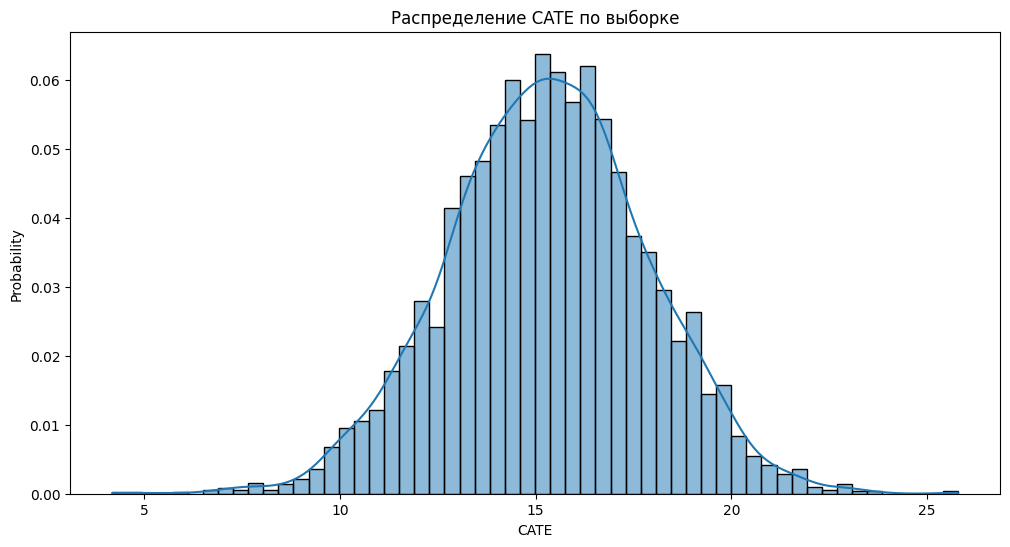

In [197]:
CATE_true = unavailable_info['recall_score_1'] - unavailable_info['recall_score_0']

plt.figure(figsize=(12, 6))
plt.title('Распределение CATE по выборке')
plt.xlabel('CATE')

sns.histplot(CATE_true, stat='probability', kde=True);

#### Результаты

In [198]:
true_effects = pd.DataFrame(data=[[ATE_true, LATE_true]],
                            columns=['ATE_true', 'LATE_true'],
                            index=['Истинные оценки'])
round(true_effects, 2)

,ATE_true,LATE_true
Истинные оценки,15.3,15.33


#### Интерпретация

- Полученные значения ATE говорят о том, что в среднем, если индивид получит высшее образование, то его recall_score на тесте увеличится на 15.3 пункта
- Значения LATE говорят, что в среднем среди тех, кто является комплайером (то есть получает высшее образование, если живет рядом с университетом, и не получает, если рядом не живет) эффект от получения высшего образование равен дополнительным 15.33 пунктам к recall_score. 
- Видно, что ATE и LATE почти не отличаются

### 3. Оцените средний эффект воздействия как разницу в средних по выборкам тех, кто получил и не получил воздействие. Опишите недостатки соответствующего подхода с учетом специфики рассматриваемой вами экономической проблемы.

Примечание: в этом пункте и далее, если не сказано иное, используются лишь
наблюдаемые значения целевой переменной.

#### Ошибочная оценка ATE

Посчитаем ${ATE_{wrong}}$ = $E[R_{1i} | {H_{i} = 1}]$ - $E[R_{0i} | {H_{i} = 0}]$

Тогда для оценки ATE используем ЗБЧ и мат. ожидания заменим на средние значения:

In [199]:
ATE_hat_wrong = df.loc[(df['higher_edu'] == 1), 'recall_score'].mean() - df.loc[(df['higher_edu'] == 0), 'recall_score'].mean()
print(f'ATE_hat_wrong = {ATE_hat_wrong:.2f}')

ATE_hat_wrong = 16.53


#### Почему это ошибочная оценка:

##### Группы получивших и не получивших воздействие (получение высшего образования) сформированы ```не случайно```

Из-за этого $E[R_{1i}] \not = E[R_{1i} | {H_{i} = 1}]$ и $E[R_{0i}] \not = E[R_{0i} | {H_{i} = 0}]$, поэтому теоретическая запись этой оценки не равна настоящему ATE.

Если бы отбор был случайным (например, реально случайная лотерея среди всего населения за обязательство того, чтобы безусловно пойти на учебу), то выполнялось бы условие $E[R_{1i}] = E[R_{1i} | {H_{i} = 1}]$

##### Интуитивно:

- Если не фиксировать случайный отбор, то возникает проблема эндогенности и самоотбора. Изначально более склонные к умственной деятельности, чтению текстов и прохождению таких тестов люди могут выбрать пойти получать высшее образование в университет. Из-за этой проблемы получается, что при такой формулировке оценки мы в качестве эффекта от образования считаем еще и вклад других факторов, а нужно считать эффект только от образования.

### 4. Используя оценки, полученные лучшими из обученных ранее классификационных и регрессионных моделей, оцените средний эффект воздействия с помощью:
- метода наименьших квадратов.
- условных математических ожиданий.
- взвешивания на обратные вероятности (в случае возникновения ошибок
убедитесь в отсутствии оценок вероятностей, равных 0 или 1 и при необ-
ходимости измените метод оценивания).
- метода, обладающего двойной устойчивостью.
- двойного машинного обучения.

Сравните результаты и назовите ключевую предпосылку этих методов. Содержательно обсудите причины, по которым она может соблюдаться или нарушаться в вашем случае. Приведите содержательную экономическую интерпретацию оценки среднего эффекта воздействия.

Повышенная сложность: включите дополнительный метод, не рассматри-
вавшийся в курсе, и опишите его принцип работы, а также преимущества и
недостатки по сравнению с другими методами.

In [200]:
ATE_hat_df = pd.DataFrame()

ATE_hat_df.loc['Истинный ATE', 'ATE_hat'] = ATE_true

#### Оценка ATE методом МНК

В качестве регрессоров берем переменную воздействия ```higher_edu```

Также берем 6 контрольных переменных: `adhd`, `low_focus`, `text_complexity`, `age`, `reads_often`, `not_tired`

Инструментальную переменную `far_from_uni` не используем

In [201]:
ols_model = smf.ols('recall_score ~ higher_edu + adhd + low_focus + text_complexity + age + reads_often + not_tired', data=df).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           recall_score   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 2.814e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:10:06   Log-Likelihood:                -9925.4
No. Observations:                5000   AIC:                         1.987e+04
Df Residuals:                    4992   BIC:                         1.992e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          24.6472      0.138    179.121      0.000      24.377      24.917
higher_edu         15.2920      0.051    301.990      0.000      15.193      15.391
adhd               -4.9092      0.082    -59.844      0.000      -5.070      -4.748
low_focus          -6.5045      0.059   -110.601      0.000      -6.620      -6.389
text_complexity     0.3536      0.002    211.355      0.000       0.350       0.357
age                 0.0039      0.003      1.229      0.219      -0.002       0.010
reads_often         4.4794      0.052     86.948      0.000       4.378       4.580
not_tired           4.8348      0.051     94.073      0.000       4.734       4.936
==============================================================================
Omnibus:                       66.988   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.966
Skew:                          -0.112   Prob(JB):                     3.59e-24
Kurtosis:                       3.684   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
ATE_hat_ols = ols_model.params['higher_edu']

ATE_hat_df.loc['Оценка МНК', 'ATE_hat'] = ATE_hat_ols

print(f'Оценка ATE методом МНК: {ATE_hat_ols:.2f}')

Оценка ATE методом МНК: 15.29


#### Оценка ATE методом условных мат. ожиданий

**Допущение об условной независимости:** $E[R_{1i} | X_i, H_i = 1] = E[Y_{1i} | X_i]$

При соблюдении допущения об условной независимости:

$ATE = E[R_{1i}] - E[R_{0i}] = E(E[R_{1i} | X_i] - E[R_{0i} | X_i]) = E( E[R_i | X_i, H_i = 1] − E[R_i | X_i, H_i = 0] )$

Это можно оценить как:

$$\hat{ATE} = \frac{1}{n} * \Sigma_{i=1}^n (E[R_i | X_i, H_i = 1] - E[R_i | X_i, H_i = 0])$$

Останется оценить E[R_i | X_i, H_i] и можно вычислить оценку ATE

$$\hat{ATE} = \frac{1}{n} * \Sigma_{i=1}^n (\hat{E}[R_i | X_i, H_i = 1] - \hat{E}[R_i | X_i, H_i = 0])$$

In [203]:
features_for_rf = ['higher_edu', 'adhd', 'low_focus', 'text_complexity', 'age', 'reads_often', 'not_tired']

treated_mask = (df['higher_edu'] == 1)
not_treated_mask = (df['higher_edu'] == 0)

X = df.loc[:, features_for_rf]
y = df.loc[:, 'recall_score']

X_treated = X.loc[treated_mask]
y_treated = y.loc[treated_mask]

X_not_treated = X.loc[not_treated_mask]
y_not_treated = y.loc[not_treated_mask]

##### Оценка лучшей моделью (регрессия Linear Regression)

In [204]:
from sklearn.linear_model import LinearRegression

lr_treated = LinearRegression()
lr_treated.fit(X_treated, y_treated)

lr_not_treated = LinearRegression()
lr_not_treated.fit(X_not_treated, y_not_treated)

y_pred_lr_treated = lr_treated.predict(X)
y_pred_lr_not_treated = lr_not_treated.predict(X)

ATE_hat_condexp_lr = np.mean(y_pred_lr_treated - y_pred_lr_not_treated)

ATE_hat_df.loc['Метод условных Мат. ожиданий (Лучшая модель)', 'ATE_hat'] = ATE_hat_condexp_lr

print(f'Оценка ATE по методу условных мат. ожиданий (Лучшая модель): {ATE_hat_condexp_lr:.2f}')

Оценка ATE по методу условных мат. ожиданий (Лучшая модель): 15.29


##### Оценка худшей моделью (регрессия KNN)

In [205]:
from sklearn.neighbors import KNeighborsRegressor

knn_treated = KNeighborsRegressor(n_neighbors=7)
knn_treated.fit(X_treated, y_treated)

knn_not_treated = KNeighborsRegressor(n_neighbors=7)
knn_not_treated.fit(X_not_treated, y_not_treated)

y_pred_knn_treated = knn_treated.predict(X)
y_pred_knn_not_treated = knn_not_treated.predict(X)

ATE_hat_condexp_knn = np.mean(y_pred_knn_treated - y_pred_knn_not_treated)

ATE_hat_df.loc['Метод условных Мат. ожиданий (Худшая модель)', 'ATE_hat'] = ATE_hat_condexp_knn

print(f'Оценка ATE по методу условных мат. ожиданий (Худшая модель): {ATE_hat_condexp_knn:.2f}')

Оценка ATE по методу условных мат. ожиданий (Худшая модель): 16.18


##### Оценка RF и Catboost

In [206]:
# Оценка RF

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]   
}

def cv_random_forest(X, y, param_grid=param_grid):
    model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=KFold(n_splits=5, shuffle=True, random_state=42), 
    )
    grid_search.fit(X, y)

    return grid_search.best_estimator_

# rf_model_treated = cv_random_forest(X_treated, y_treated)
# rf_model_not_treated = cv_random_forest(X_not_treated, y_not_treated)

# y_pred_treated = rf_model_treated.predict(X)
# y_pred_not_treated = rf_model_not_treated.predict(X)

# ATE_hat_condexp = np.mean(y_pred_treated - y_pred_not_treated)

# print(f'Оценка ATE по методу условных мат. ожиданий: {ATE_hat_condexp:.2f}')

In [207]:
# Оценка CB

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from catboost import CatBoostRegressor

catboost_param_grid = {
    'iterations': [100, 200, 300],     
    'depth': [3, 5, 7],                
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]           
}

def cv_catboost(X, y, param_grid=catboost_param_grid):
    model = CatBoostRegressor(random_state=42, silent=True) 
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        scoring='neg_mean_squared_error',
    )
    grid_search.fit(X, y)
    return grid_search.best_estimator_


# cb_model_treated = cv_catboost(X_treated, y_treated)

# cb_model_not_treated = cv_catboost(X_not_treated, y_not_treated)

# y_pred_treated_cb = cb_model_treated.predict(X)
# y_pred_not_treated_cb = cb_model_not_treated.predict(X)

# ATE_cb = np.mean(y_pred_treated_cb - y_pred_not_treated_cb)
# print(f'Оценка ATE по методу условных мат. ожиданий: (CatBoost): {ATE_cb:.2f}')

#### Оценка ATE методом взвешенных обратных вероятностей

Снова требуется предпосылка об условной независимости

Тогда будет выполняться

$ATE = E[\cfrac{H_i * Y_i}{P(H_i = 1|X_i)}] − E[\cfrac{(1 - H_i) * Y_i}{1 - P(H_i = 1|X_i)}]$

Тогда оценка $\hat{ATE} = \cfrac{1}{n} \Sigma_{i=1}^n (\cfrac{H_i * Y_i}{\hat{P}(H_i = 1|X_i)}) - \cfrac{(1 - H_i) * Y_i}{1 - \hat{P}(H_i = 1|X_i)}$

Останется только оценить $\hat{P}(H_i | X_i)$

In [208]:
X_for_p_weights = df.loc[:, ['adhd', 'low_focus', 'text_complexity', 'age', 'reads_often', 'not_tired']]
y_for_p_weights = df.loc[:, 'higher_edu']

##### Оценка RF и Catboost

In [209]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# RF

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]   
}

def cv_random_forest_classifier(X, y, param_grid=param_grid):
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=KFold(n_splits=5, shuffle=True, random_state=42), 
    )
    grid_search.fit(X, y)

    return grid_search.best_estimator_



# CATBOOST

catboost_param_grid = {
    'iterations': [100, 200, 300],     
    'depth': [3, 5, 7],                
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]           
}

def cv_catboost_classifier(X, y, param_grid=catboost_param_grid):
    model = CatBoostClassifier(random_state=42, silent=True) 
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_log_loss',
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
    )
    grid_search.fit(X, y)
    return grid_search.best_estimator_


# rf_for_p_weights_model = cv_random_forest_classifier(X_for_p_weights, y_for_p_weights)
# rf_probas_for_p_weights = rf_for_p_weights_model.predict_proba(X_for_p_weights)[:, 1]
# cb_for_p_weights_model = cv_catboost_classifier(X_for_p_weights, y_for_p_weights)
# cb_probas_for_p_weights = cb_for_p_weights_model.predict_proba(X_for_p_weights)[:, 1]



# part_for_p_weights_rf = (df['higher_edu'] * df['recall_score'] / rf_probas_for_p_weights - (1 - df['higher_edu']) * df['recall_score'] / (1 - rf_probas_for_p_weights))

# part_for_p_weights_cb = (df['higher_edu'] * df['recall_score'] / cb_probas_for_p_weights - (1 - df['higher_edu']) * df['recall_score'] / (1 - cb_probas_for_p_weights))

# part_for_p_weights_logreg = (df['higher_edu'] * df['recall_score'] / logreg_probas_for_p_weights - (1 - df['higher_edu']) * df['recall_score'] / (1 - logreg_probas_for_p_weights))

# ATE_hat_pweights_rf = np.mean(part_for_p_weights_rf)
# ATE_hat_pweights_cb = np.mean(part_for_p_weights_cb)
# ATE_hat_pweights_logreg = np.mean(part_for_p_weights_logreg)

# print(f'Оценка ATE методом взвешенных вероятностей (модель RF): {ATE_hat_pweights_rf:.2f}')
# print(f'Оценка ATE методом взвешенных вероятностей (модель CatBoost): {ATE_hat_pweights_cb:.2f}')
# print(f'Оценка ATE методом взвешенных вероятностей (модель LogReg): {ATE_hat_pweights_logreg:.2f}')

##### Оценка лучшей моделью (классификация Логистическая регрессия)

In [210]:
best_params_for_logreg = {'C': 0.7, 
                          'penalty': 'l1', 
                          'max_iter': 30,
                          'random_state': 666, 
                          'solver': 'saga'}

logreg_for_p_weights_model = LogisticRegression(**best_params_for_logreg).fit(X_for_p_weights, y_for_p_weights)
logreg_probas_for_p_weights = logreg_for_p_weights_model.predict_proba(X_for_p_weights)[:, 1]

The max_iter was reached which means the coef_ did not converge


##### Оценка худшей моделью (классификация GradientBoosting)

In [211]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_for_p_weights_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=3, random_state=666)
grad_boost_for_p_weights_model.fit(X_for_p_weights, y_for_p_weights)

grad_boost_probas_for_p_weights = grad_boost_for_p_weights_model.predict_proba(X_for_p_weights)[:, 1]

In [212]:
part_for_p_weights_logreg = (df['higher_edu'] * df['recall_score'] / logreg_probas_for_p_weights - (1 - df['higher_edu']) * df['recall_score'] / (1 - logreg_probas_for_p_weights))

part_for_p_weights_gb = (df['higher_edu'] * df['recall_score'] / grad_boost_probas_for_p_weights - (1 - df['higher_edu']) * df['recall_score'] / (1 - grad_boost_probas_for_p_weights))

ATE_hat_pweights_gb = np.mean(part_for_p_weights_gb)
ATE_hat_pweights_logreg = np.mean(part_for_p_weights_logreg)

ATE_hat_df.loc['Метод взвешенных обратных вероятностей (Лучшая модель)', 'ATE_hat'] = ATE_hat_pweights_logreg
ATE_hat_df.loc['Метод взвешенных обратных вероятностей (Худшая модель)', 'ATE_hat'] = ATE_hat_pweights_gb

print(f'Оценка ATE методом взвешенных вероятностей (Худшая модель): {ATE_hat_pweights_gb:.2f}')
print(f'Оценка ATE методом взвешенных вероятностей (Лучшая модель): {ATE_hat_pweights_logreg:.2f}')

Оценка ATE методом взвешенных вероятностей (Худшая модель): 15.35
Оценка ATE методом взвешенных вероятностей (Лучшая модель): 15.34


#### Оценка ATE методом Двойной устойчивости (DRE)

У прошлых двух методов есть проблема - нужно иметь состоятельную оценку $E[Y_i | X_i, H_i]$ или $P(H_i = 1 | X_i)$, причем понять что полученная численная оценка состоятельна сложно, поэтому это добавляет неопределенности в выборе метода.

Double Robust метод помогает устранить неопределенность. Ему достаточно иметь состоятельную оценку хотя бы одну из этих двух. Согласно этому методу:

$\hat{ATE_{DR}} = \cfrac{1}{n} \Sigma_{i=1}^n ( E[R_i | X_i, H_i = 1] - E[R_i | X_i, H_i = 0] ) + \cfrac{1}{n} \Sigma_{i=1}^n (\cfrac{H_i * (R_i - E[R_i | X_i, H_i = 1])}{\hat{P}(H_i = 1|X_i)} - \cfrac{(1 - H_i) * (R_i - E[R_i | X_i, H_i = 0])}{1 - \hat{P}(H_i = 1|X_i)})$

У нас все уже оценено, поэтому подставим все оценки в формулу и получим оценку $ATE$

In [213]:
ATE_hat_dr_best = np.mean(y_pred_lr_treated - y_pred_lr_not_treated) + np.mean(df['higher_edu'] * (df['recall_score'] - y_pred_lr_treated) / logreg_probas_for_p_weights - (1 - df['higher_edu']) * (df['recall_score'] - y_pred_lr_not_treated) / (1 - logreg_probas_for_p_weights))

ATE_hat_dr_worst = np.mean(y_pred_knn_treated - y_pred_knn_not_treated) + np.mean(df['higher_edu'] * (df['recall_score'] - y_pred_knn_treated) / grad_boost_probas_for_p_weights - (1 - df['higher_edu']) * (df['recall_score'] - y_pred_knn_not_treated) / (1 - grad_boost_probas_for_p_weights))

ATE_hat_df.loc['Метод двойной устойчивости (Лучшие модели)', 'ATE_hat'] = ATE_hat_dr_best
ATE_hat_df.loc['Метод двойной устойчивости (Худшие модели)', 'ATE_hat'] = ATE_hat_dr_worst

print(f'Оценка методом двойной устойчивости (Лучшие модели): {ATE_hat_dr_best:.2f}')
print(f'Оценка методом двойной устойчивости (Худшие модели): {ATE_hat_dr_worst:.2f}')

Оценка методом двойной устойчивости (Лучшие модели): 15.29
Оценка методом двойной устойчивости (Худшие модели): 15.55


#### Оценка ATE методом Двойного машинного обучения (Double ML)

- Средний эффект воздействия можно оценить, рассмотрев уравнение
  
  $$
  Y_i = g(T_i, X_i) + \varepsilon_i,
  \qquad
  ATE = E\bigl[g(1, X_i) - g(0, X_i)\bigr].
  $$

- Предположение об условной независимости:
  
  $$
  E(\varepsilon_i \mid X_i, T_i) = 0.
  $$

- Рассматривается нужная форма вклада $\psi$:
  
  $$
  \psi_i
  = \frac{T_i\,(Y_i - g_1(X_i))}{g_T(X_i)}
    - \frac{(1 - T_i)\,(Y_i - g_0(X_i))}{1 - g_T(X_i)}
    + g_1(X_i) - g_0(X_i) - ATE,
  $$
  
  где
  $$
  g_1(X_i) = E[Y_i \mid X_i, T_i = 1], \quad
  g_0(X_i) = E[Y_i \mid X_i, T_i = 0], \quad
  g_T(X_i) = P(T_i = 1 \mid X_i).
  $$

- Оценка с двойной устойчивостью (cross-fitting):
  
  $$
  \widehat{ATE}
  = \frac{1}{n} \sum_{i=1}^n
    \left[
      \frac{T_i\,(Y_i - \widehat{g}_1^{(q_i)}(X_i))}{\widehat{g}_T^{(q_i)}(X_i)}
      - \frac{(1 - T_i)\,(Y_i - \widehat{g}_0^{(q_i)}(X_i))}{1 - \widehat{g}_T^{(q_i)}(X_i)}
      + \widehat{g}_1^{(q_i)}(X_i) - \widehat{g}_0^{(q_i)}(X_i)
    \right].
  $$

- Функции $\widehat{g}$ оцениваются на данных не вошедших в k-й фолд


In [214]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import doubleml
from econml.dml import LinearDML


X_dml = df.loc[:, ['adhd', 'low_focus', 'text_complexity', 'age', 'reads_often', 'not_tired']]
T_dml = df.loc[:, 'higher_edu']
y_dml = df.loc[:, 'recall_score']


def get_dml_ate(model_y=RandomForestRegressor(), model_t=RandomForestClassifier()):

    dml_model_rf = LinearDML(
        model_y=model_y,  # Модель для Y
        model_t=model_t,  # Модель для D
        discrete_treatment=True,
        cv=5
    )

    dml_model_rf.fit(y_dml, T_dml, X=X_dml)

    ATE_dml = dml_model_rf.ate(X_dml)

    return ATE_dml

##### Оценка лучшими моделями(Регрессия - Линейная регрессия, Классификация - Логистическая регрессия)

In [215]:
ATE_hat_dml_best_models = get_dml_ate(LinearRegression(), 
                                      LogisticRegression(**best_params_for_logreg))

ATE_hat_df.loc['Метод Double ML (Лучшие модели)', 'ATE_hat'] = ATE_hat_dml_best_models
print(f'Оценка методом Double ML (Лучшие модели): {ATE_hat_dml_best_models:.2f}')

Оценка методом Double ML (Лучшие модели): 15.24


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


##### Оценка худшими моделями (Регрессия - KNN, Классификация - Бустинг)

In [216]:
ATE_hat_dml_worst_models = get_dml_ate(KNeighborsRegressor(n_neighbors=7), 
                                       GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=3, random_state=666))

ATE_hat_df.loc['Метод Double ML (Худшие модели)', 'ATE_hat'] = ATE_hat_dml_worst_models
print(f'Оценка методом Double ML (Худшие модели): {ATE_hat_dml_worst_models:.2f}')

Оценка методом Double ML (Худшие модели): 15.31


#### Propensity Score Matching

Нужно оценить Propensity Score = $P(H_i = 1 | X_i)$ - это мы уже делали для оценки ATE методом взвешивания вероятностей

Будем искать "близнецов" среди получивших образование и неполучивших.

#### Описать преимущества и недостатки

In [217]:
from sklearn.neighbors import NearestNeighbors


treated_propensity_score_best_models = logreg_probas_for_p_weights[treated_mask].reshape(-1, 1)
not_treated_propensity_score_best_models = logreg_probas_for_p_weights[not_treated_mask].reshape(-1, 1)

treated_propensity_score_worst_models = grad_boost_probas_for_p_weights[treated_mask].reshape(-1, 1)
not_treated_propensity_score_worst_models = grad_boost_probas_for_p_weights[not_treated_mask].reshape(-1, 1)

nn_best = NearestNeighbors(n_neighbors=3).fit(not_treated_propensity_score_best_models)
nn_worst = NearestNeighbors(n_neighbors=3).fit(not_treated_propensity_score_worst_models)

indices_best = nn_best.kneighbors(treated_propensity_score_best_models, return_distance=False)
indices_worst = nn_worst.kneighbors(treated_propensity_score_worst_models, return_distance=False)


# Индексы matched control
control_indices = np.where(not_treated_mask)[0]

matched_control_indices_best = control_indices[indices_best.flatten()]
matched_control_indices_worst = control_indices[indices_worst.flatten()]


y_treated = y_dml.values[treated_mask]

y_matched_best = y_dml.values[matched_control_indices_best].reshape(len(y_treated), 3)
y_matched_worst = y_dml.values[matched_control_indices_worst].reshape(len(y_treated), 3)


ATE_hat_psm_best = (y_treated - y_matched_best.mean(axis=1)).mean()
ATE_hat_psm_worst = (y_treated - y_matched_worst.mean(axis=1)).mean()

ATE_hat_df.loc['Метод PSM (Лучшие модели)', 'ATE_hat'] = ATE_hat_psm_best
ATE_hat_df.loc['Метод PSM (Худшие модели)', 'ATE_hat'] = ATE_hat_psm_worst

print(f"Оценка ATE методом PSM (Лучшие модели): {ATE_hat_psm_best:.2f}")
print(f"Оценка ATE методом PSM (Худшие модели): {ATE_hat_psm_worst:.2f}")

Оценка ATE методом PSM (Лучшие модели): 15.33
Оценка ATE методом PSM (Худшие модели): 14.48


#### Все результаты вместе

In [218]:
round(ATE_hat_df, 2)

,ATE_hat
Истинный ATE,15.30
Оценка МНК,15.29
Метод условных Мат. ожиданий (Лучшая модель),15.29
Метод условных Мат. ожиданий (Худшая модель),16.18
Метод взвешенных обратных вероятностей (Лучшая модель),15.34
Метод взвешенных обратных вероятностей (Худшая модель),15.35
Метод двойной устойчивости (Лучшие модели),15.29
Метод двойной устойчивости (Худшие модели),15.55
Метод Double ML (Лучшие модели),15.24
Метод Double ML (Худшие модели),15.31


#### Используемая предпосылка

**Допущение об условной независимости:** 
$$E[R_{1i} | X_i, H_i = 1] = E[Y_{1i} | X_i], \quad E[R_{0i} | X_i, H_i = 0] = E[Y_{0i} | X_i]$$ 

По смыслу это означает, что если мы смотрим на индивидов с одинаковыми значениями контрольных переменных, то информация о наличии тритмента (полученное высшее образование) не будет влиять на ожидаемый результат на тесте



**Почему она может нарушаться:**
 
- Мы можем учитывать не все смешивающие переменные, которые связаны и с таргетом, и тритментом, поэтому возникает проблема пропущенной переменной
- К тому же, тогда может не выполняться условие $0 < P (T_i = 1 | X_i ) < 1$. То есть мы можем не учесть индивидов, которые физически не могли получить высшее образование (у них условная вероятность получения высшего образования равна 0)

**Почему эта предпосылка может выполняться у нас:**

- При генерации данных мы учли, что полученные контрольные переменные - единственные, которые влияют на таргет и тритмент, то есть пропущенной переменной нет

#### Сравнение методов

Многие методы оценки ATE приблизились к истинному значению, но ближе всех были методы:
- Оценка МНК
- Метод условных Мат. ожиданий по лучшей модели (Линейная регрессия)
- Метод взвешенных обратных вероятностей по лучшей модели (Логистическая регрессия)
- Метод взвешенных обратных вероятностей по худшей модели (Градиентный бустинг)
- Метод двойной устойчивости по лучшим моделям
- Метод Double ML по худшим моделям
- Метод PSM по лучшим моделям

Каждая рассмотренная модель смогла дать близкую оценку ATE

Такие хорошие результаты могут быть обусловлены процессом генерации данных, который в рамках учебного задания упрощен. Например, в реальной жизни наверняка больше переменных влияет на таргет и тритмент, а зависимости в данных наверняка более сложные, чем предполагаем мы. На реальных данных наши модели вероятно бы дали результат хуже.

### 5. Оцените локальный условный эффект воздействия с помощью:
- двойного машинного обучения без инструментальной переменной.
- двойного машинного обучения с инструментальной переменной.

Сопоставьте результаты и объясните, в чем в вашем случае будет заключаться
различие между средним эффектом воздействия и локальным средним эффек-
том воздействия. Приведите содержательную экономическую интерпретацию
оценки локального среднего эффекта воздействия.
Повышенная сложность: воспользуйтесь также параметрической моделью,
например, с помощью пакета switchSelection. Обсудите преимущества и недостатки такого подхода по сравнению с двойным машинным обучением. Обычный метод инструментальных переменных параметрическим подходом не считается.

In [225]:
late_hat_df = pd.DataFrame()

late_hat_df.loc['Истинный LATE', 'LATE_hat'] = LATE_true

#### Оценка LATE методом двойного машинного обучения без инструментальной переменной

LATE этим методом оценивать нельзя, так как требуется инструмент. Если инструмент не используется, то мы оцениваем ATE, а тогда оценка LATE этим методом даст смещение.

Оценивали в прошлых пунктах. 

In [226]:
late_hat_df.loc['DML без инструмента (лучшие модели)', 'LATE_hat'] = ATE_hat_dml_best_models
late_hat_df.loc['DML без инструмента (худише модели)', 'LATE_hat'] = ATE_hat_dml_worst_models

#### Оценка LATE методом двойного машинного обучения с инструментальной переменной

In [ ]:
from econml.iv.dml import OrthoIV

X_dml = df.loc[:, ['adhd', 'low_focus', 'text_complexity', 'age', 'reads_often', 'not_tired']]
T_dml = df.loc[:, 'higher_edu']
Z_dml = df.loc[:, 'far_from_uni']
y_dml = df.loc[:, 'recall_score']

model_iv = OrthoIV(
    model_y_xw=LinearRegression(),                            # Y|X
    model_t_xw=LogisticRegression(**best_params_for_logreg),  # D|X,Z
    model_z_xw=LogisticRegression(**best_params_for_logreg),  # Z|X
    discrete_treatment=True,
    discrete_instrument=True
)
model_iv.fit(Y=y_dml, T=T_dml, Z=Z_dml, X=X_dml)

late_dml = model_iv.effect(X_dml).mean()

late_hat_df.loc['DML с инструментом', 'LATE_hat'] = late_dml

print(f"Оценка LATE методом DML(IV): {late_dml:.2f}")

Оценка LATE методом DML(IV): 15.36


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


#### Результаты

Методы DML дают довольно близкую оценку

In [231]:
round(late_hat_df, 2)

,LATE_hat
Истинный LATE,15.33
DML без инструмента (лучшие модели),15.24
DML без инструмента (худише модели),15.31
DML с инструментом,15.36


#### Интерпретация

- Для нашего исследования ATE - это общий средний эффект от получения высшего образования, независимо от того, кем является человек: комплаером, always-taker'ом или never-taker'ом.
- LATE - это оценка среднего эффекта на полученную оценку на тесте для тех респондентов, кто является комплаером - то есть если респондент жил в регионе с университетом из топ-100 рейтинга университетов, то он получил высшее образование. А если в регионе нет такого университета, то и образование он не получил. В жизни таких людей можно представить как тех, кто привязан к своему домашнему региону (но не обязательно таких) и если у них есть условия для получения высшего образования, то они идут его получать, а если нет, то не идут.

### 6. Оцените условные средние эффекты воздействия с помощью:
- метода наименьших квадратов
- S-learner
- T-learner
- метода трансформации классов
- X-learner

Сравните результаты и обсудите, насколько в вашем случае мотивированы применение метода X-learner. Опишите, как можно было бы использовать полученные вами оценки в бизнесе или при реализации государственных программ.Повышенная сложность: включите дополнительный метод, не рассматривавшийся в курсе и опишите его принцип работы, а также преимущества и недостатки по сравнению с другими методами.

#### Оценка CATE методом МНК

Этот метод предполагает экзогенный тритмент, то есть отсутствие эндогенности в переменной $H_i$, но в нашем случае это неверная предпосылка. Тем не менее, оценим МНК для оценки CATE

In [232]:
interactions = pd.DataFrame({f'higher_edu*{col}': T_dml * X_dml.loc[:, col] for col in ['adhd', 'low_focus', 'text_complexity', 'age', 'reads_often', 'not_tired']})

regressors_for_ols = sm.add_constant(pd.concat([pd.Series(T_dml), pd.DataFrame(X_dml), interactions], axis=1))

model = sm.OLS(y_dml, regressors_for_ols)
results = model.fit()
results.summary()

# CATE(x) = coef_D + sum(coef_D_Xi * x_i)
cate = results.params['higher_edu'] + X_dml @ results.params[interactions.columns].values

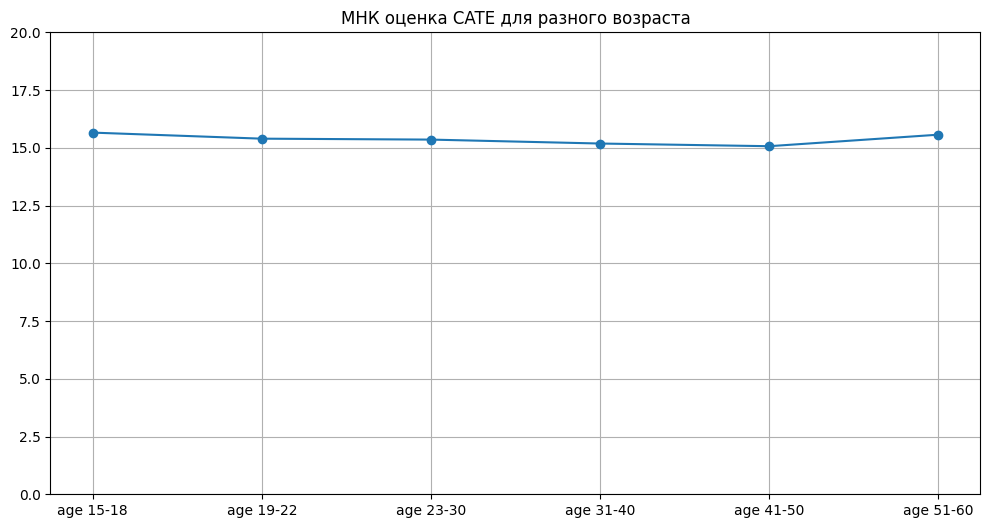

In [233]:
cates_age_groups_OLS = []
age_groups = {
    'age 15-18': (15 <= X_dml['age']) & (X_dml['age'] <= 18),
    'age 19-22': (19 <= X_dml['age']) & (X_dml['age'] <= 22),
    'age 23-30': (23 <= X_dml['age']) & (X_dml['age'] <= 30),
    'age 31-40': (31 <= X_dml['age']) & (X_dml['age'] <= 40),
    'age 41-50': (41 <= X_dml['age']) & (X_dml['age'] <= 50),
    'age 51-60': (51 <= X_dml['age']),
}

for age_group, age_mask in age_groups.items():
    cates_age_groups_OLS.append(cate.loc[age_mask].mean())

CATE_by_age_OLS = pd.DataFrame({'CATE': cates_age_groups_OLS,
                            'age': age_groups.keys()})

plt.figure(figsize=(12, 6))
plt.plot(CATE_by_age_OLS['age'], CATE_by_age_OLS['CATE'], marker='o')
plt.title('МНК оценка CATE для разного возраста')
plt.grid()
plt.ylim(0, 20);

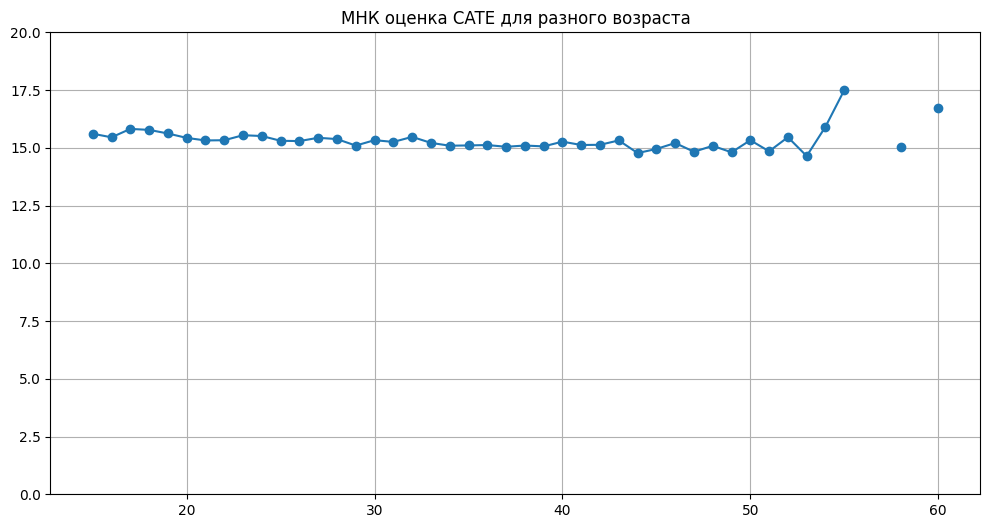

In [234]:
cates_age = []
ages = list(range(15, 61))
for age in ages:
    age_mask = X_dml['age'] == age
    cates_age.append(cate.loc[age_mask].mean())

CATE_by_age = pd.DataFrame({'CATE': cates_age,
                            'age': ages})

plt.figure(figsize=(12, 6))
plt.plot(CATE_by_age['age'], CATE_by_age['CATE'], marker='o')
plt.title('МНК оценка CATE для разного возраста')
plt.grid()
plt.ylim(0, 20);

#### Оценка CATE методом S-Learner

Для вычисления CATE используется **одна** модель машинного обучения

In [235]:
X_slearner = pd.concat([X_dml, T_dml], axis=1)

best_model_for_slearner = cv_random_forest(X=X_slearner,
                                           y=y_dml)

In [238]:
y_1_slearner = best_model_for_slearner.predict(pd.concat([X_dml, pd.Series(1, index=X_dml.index, name='higher_edu')], axis=1))
y_0_slearner = best_model_for_slearner.predict(pd.concat([X_dml, pd.Series(0, index=X_dml.index, name='higher_edu')], axis=1))

cte_slearner = y_1_slearner - y_0_slearner

In [239]:
# Графики для CATE по возрасту

def show_cate_by_age_group(X_dml, cte, method='МНК'):
    cates_age_groups = []

    age_groups = {
        'age 15-18': (15 <= X_dml['age']) & (X_dml['age'] <= 18),
        'age 19-22': (19 <= X_dml['age']) & (X_dml['age'] <= 22),
        'age 23-30': (23 <= X_dml['age']) & (X_dml['age'] <= 30),
        'age 31-40': (31 <= X_dml['age']) & (X_dml['age'] <= 40),
        'age 41-50': (41 <= X_dml['age']) & (X_dml['age'] <= 50),
        'age 51-60': (51 <= X_dml['age']),
    }

    for age_group, age_mask in age_groups.items():
        cates_age_groups.append(cte[age_mask].mean())

    CATE_by_age = pd.DataFrame({'CATE': cates_age_groups,
                                'age': age_groups.keys()})

    plt.figure(figsize=(12, 6))
    plt.plot(CATE_by_age['age'], CATE_by_age['CATE'], marker='o')
    plt.title(f'{method}-оценка CATE для разного возраста')
    plt.grid()
    plt.xlabel('Возраст')
    plt.ylim(0, 20)


def show_cate_by_age(X_dml, cte, method='МНК'):
    cates_age = []
    ages = list(range(15, 61))
    for age in ages:
        age_mask = X_dml['age'] == age
        cates_age.append(cte[age_mask].mean())

    CATE_by_age = pd.DataFrame({'CATE': cates_age,
                                'age': ages})

    plt.figure(figsize=(12, 6))
    plt.plot(CATE_by_age['age'], CATE_by_age['CATE'], marker='o')
    plt.title(f'{method}-оценка CATE для разного возраста')
    plt.xlabel('Возраст')
    plt.grid()
    plt.ylim(0, max(20, max(CATE_by_age['CATE']) + 2));

In [240]:
# Графики для CATE по СДВГ

def show_cate_by_adhd(X_dml, cte, method='МНК'):
    cates_adhd_groups = []

    adhd_groups = {
        'Has_ADHD': (X_dml['adhd'] == 1),
        'No_ADHD': (X_dml['adhd'] == 0),
    }

    for adhd_group, adhd_mask in adhd_groups.items():
        cates_adhd_groups.append(cte[adhd_mask].mean())

    CATE_by_adhd = pd.DataFrame({'CATE': cates_adhd_groups,
                                'adhd': adhd_groups.keys()})

    plt.figure(figsize=(12, 6))
    sns.barplot(data=CATE_by_adhd, x='adhd', y='CATE')
    plt.title(f'{method}-оценка CATE для людей с СДВГ и без')
    plt.grid()
    plt.xlabel('Группа')
    plt.ylim(0, 20)

Mean of empty slice.
invalid value encountered in scalar divide


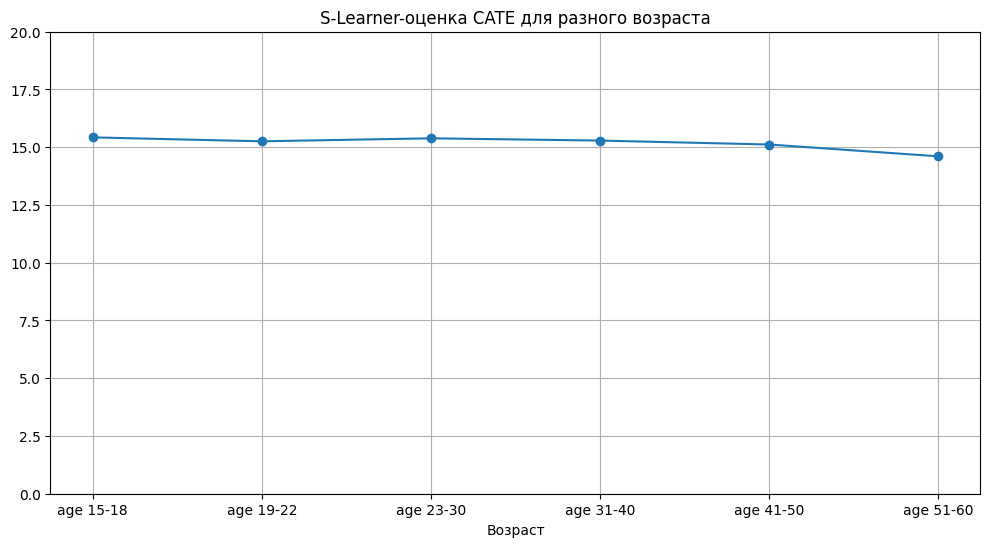

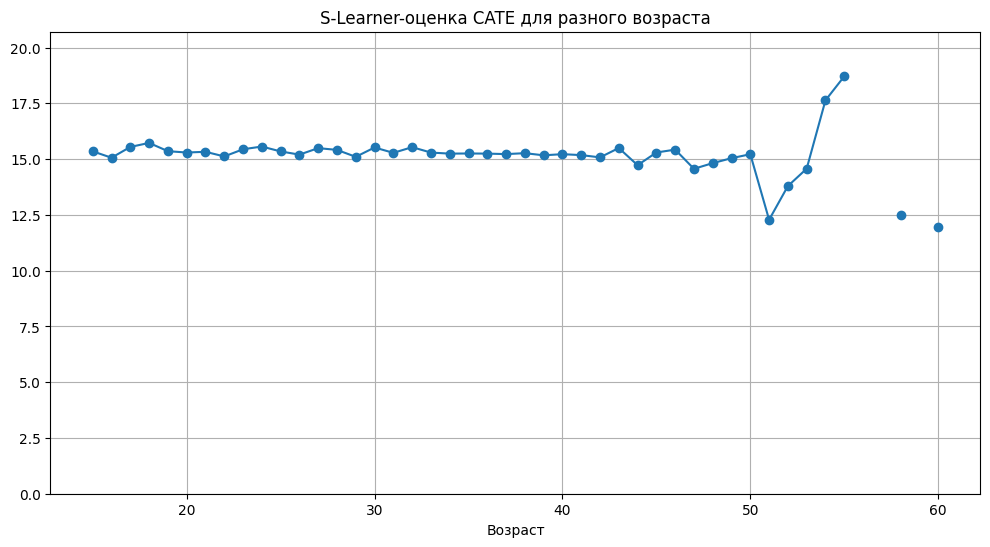

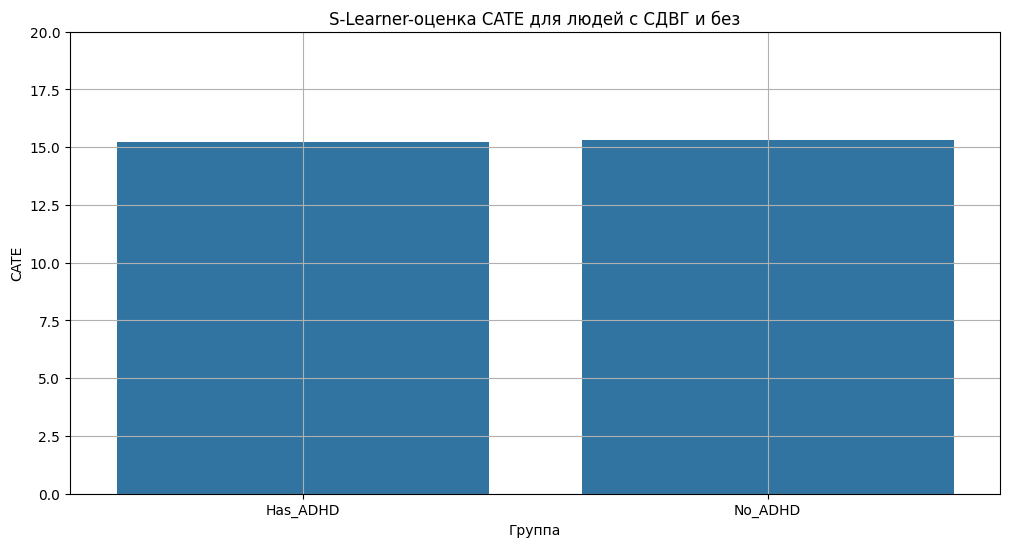

In [241]:
show_cate_by_age_group(X_dml, cte_slearner, 'S-Learner')

show_cate_by_age(X_dml, cte_slearner, 'S-Learner')

show_cate_by_adhd(X_dml, cte_slearner, 'S-Learner')

#### Оценка CATE методом T-Learner

In [242]:
X_tlearner = pd.concat([X_dml, T_dml], axis=1)

X_tlearner_1 = X_tlearner[T_dml == 1]
y_tlearner_1 = y_dml[T_dml == 1]

X_tlearner_0 = X_tlearner[T_dml == 0]
y_tlearner_0 = y_dml[T_dml == 0]

best_model_for_tlearner_1 = cv_random_forest(X=X_tlearner_1,
                                             y=y_tlearner_1)

best_model_for_tlearner_0 = cv_random_forest(X=X_tlearner_0,
                                             y=y_tlearner_0)

In [243]:
y_pred_tlearner_1 = best_model_for_tlearner_1.predict(X_tlearner)
y_pred_tlearner_0 = best_model_for_tlearner_0.predict(X_tlearner)

cte_tlearner = y_pred_tlearner_1 - y_pred_tlearner_0

Mean of empty slice.
invalid value encountered in scalar divide


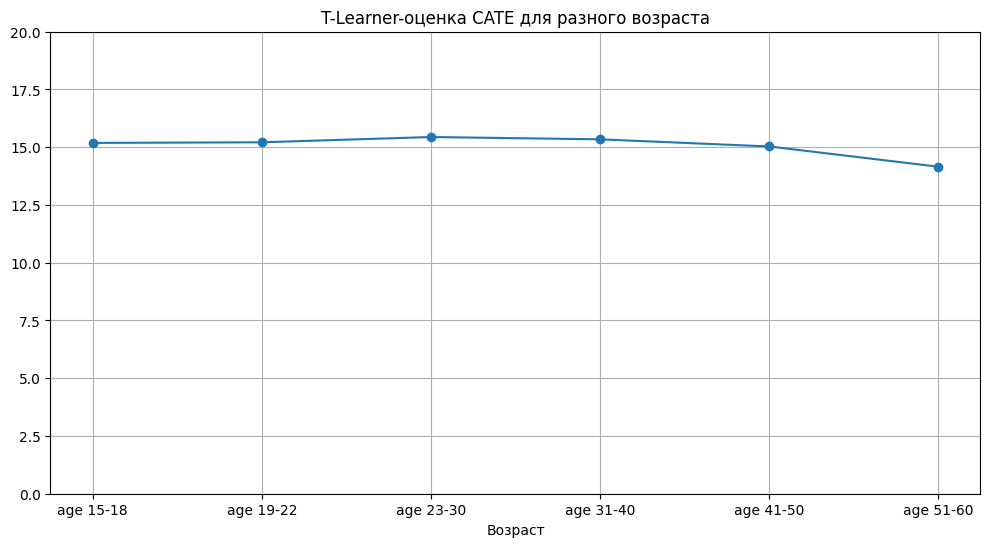

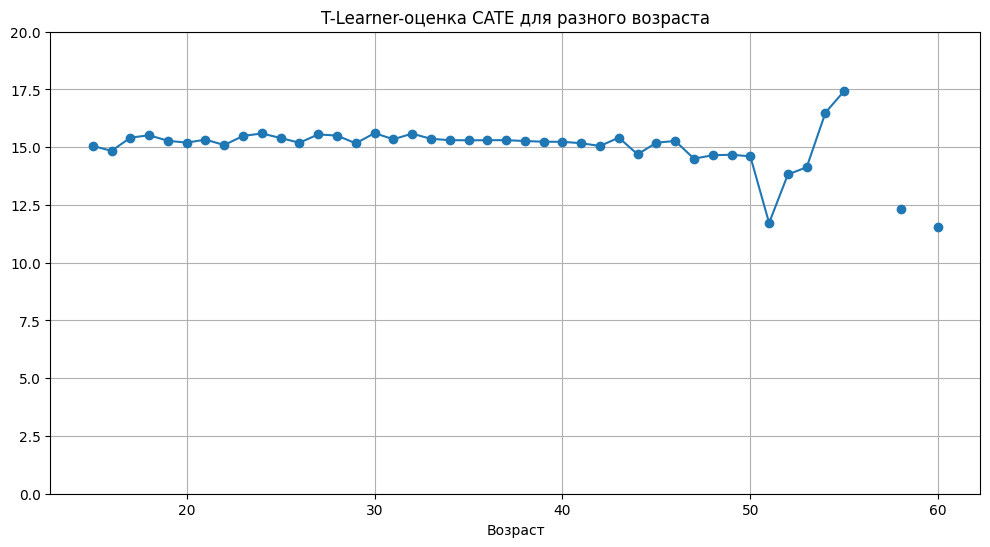

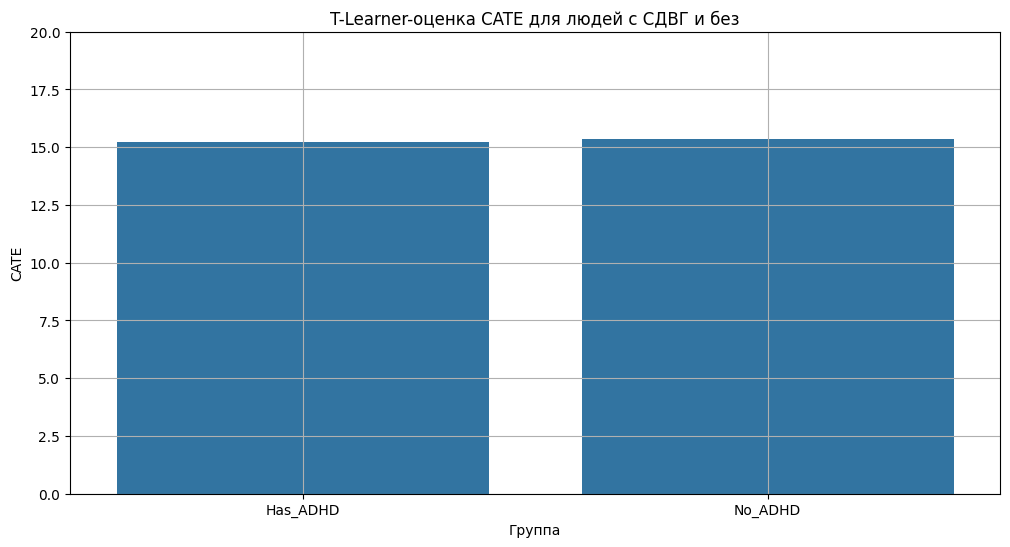

In [244]:
show_cate_by_age_group(X_dml, cte_tlearner, 'T-Learner')

show_cate_by_age(X_dml, cte_tlearner, 'T-Learner')

show_cate_by_adhd(X_dml, cte_tlearner, 'T-Learner')

#### Оценка CATE методом Трансформации классов

Считается псевдоисход:

$$y_i^* = y_i \cdot (\cfrac{H_i}{P(H_i = 1| X_i)} - \cfrac{1 - H_i}{1 - P(H_i = 1| X_i)})$$

Оценка псевдоисхода при оценка $\hat{P}(H_i = 1| X_i)$:

$$\hat{y_i^*} = y_i \cdot (\cfrac{H_i}{\hat{P}(H_i = 1| X_i)} - \cfrac{1 - H_i}{1 - \hat{P}(H_i = 1| X_i)})$$

Оценкой CATE будет оценка псевдоисхода

Алгоритм:

1) Оценить $\hat{P}(H_i = 1| X_i)$
2) Вычислить $\hat{y_i^*}$
3) Оценка $E[\hat{y_i^*} | X_i]$ методом машинного обучения и есть CATE

In [245]:
# Оценка (H_i = 1 | X_i)
rf_for_transform_classes_model = cv_random_forest_classifier(X_dml, T_dml)
rf_probas_for_transform_classes = rf_for_transform_classes_model.predict_proba(X_dml)[:, 1]

In [246]:
# Псевдоисходы
y_pseudo_for_transform_classes = y_dml * (T_dml / rf_probas_for_transform_classes - (1 - T_dml) / (1 - rf_probas_for_transform_classes))

In [247]:
# Обучение модели для CATE
best_model_for_transform_classes = cv_random_forest(X_dml, y_pseudo_for_transform_classes)

Mean of empty slice.
invalid value encountered in scalar divide


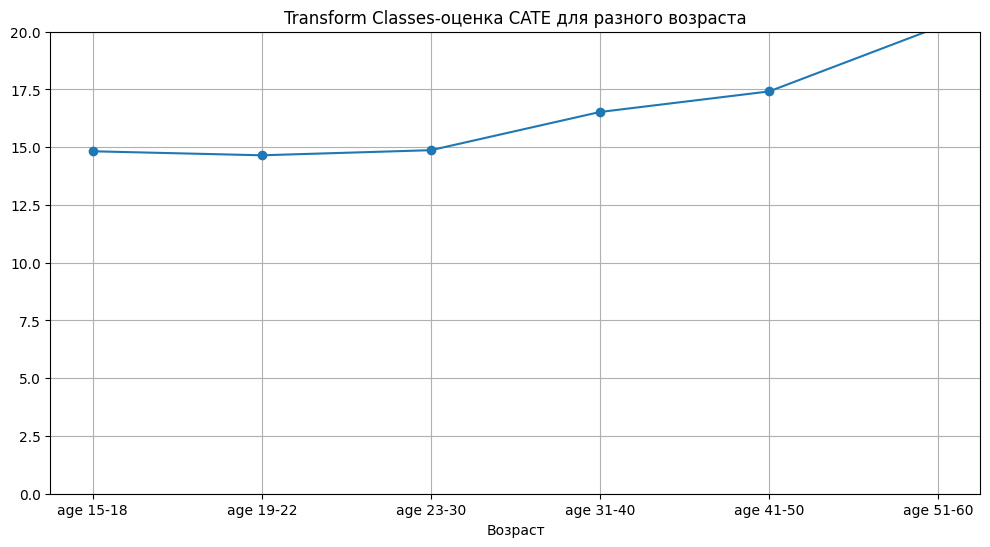

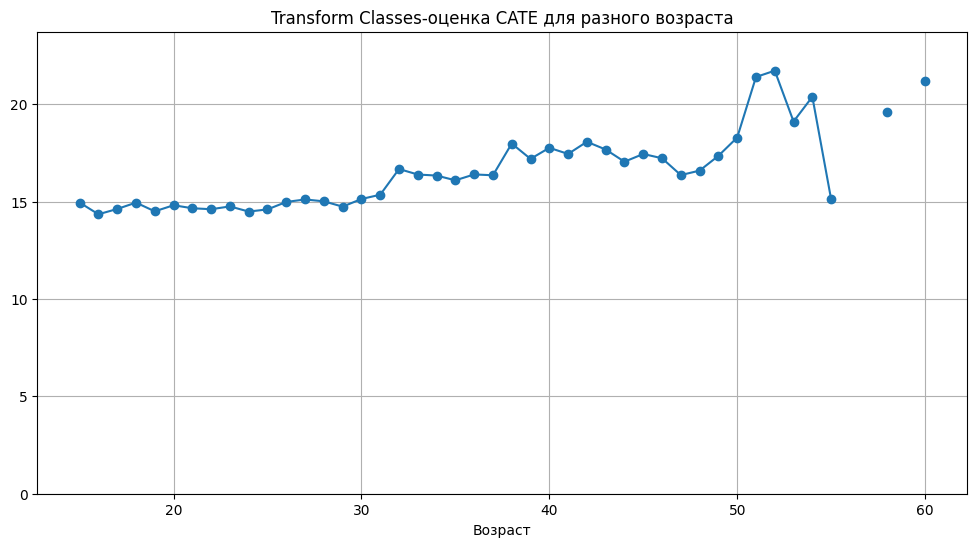

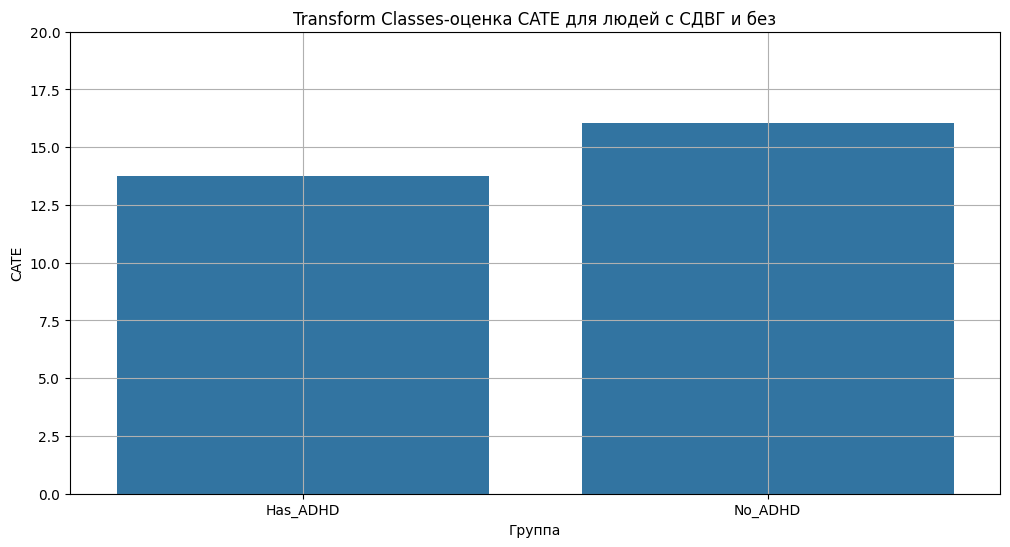

In [248]:
# Оценка CATE
cte_hat_transform_classes = best_model_for_transform_classes.predict(X_dml)

show_cate_by_age_group(X_dml, cte_hat_transform_classes, 'Transform Classes')

show_cate_by_age(X_dml, cte_hat_transform_classes, 'Transform Classes')

show_cate_by_adhd(X_dml, cte_hat_transform_classes, 'Transform Classes')

#### Оценка CATE методом X-Learner

Этот метод решает проблему отсечения большей части выборки при сложных условиях на признаки. Оценки на малочисленных группах становятся эффективнее

Суть:

Строится вспомогательная переменная: $$D_{1i} = y_{1i} - E[y_i | X_i, H_i = 0]$$

При соблюдении предположения об условной независимости верно:

$$E[D_{1i} | X_i] = E[y_{1i} | X_i] - E[y_i | X_i, H_i = 0] = E[y_{1i} | X_i] - E[y_{0i} | X_i] = CATE_i$$

Сам алгоритм:

1) Оценка $E[y_i | X_i, H_i = 0], E[y_i | X_i, H_i = 1]$
2) Расчет вспомогательной переменной $\hat{D_{1i}} = y_{1i} - \hat{E}[y_i | X_i, H_i = 0]$ и $\hat{D_{0i}} = \hat{E}[y_i | X_i, H_i = 1] - y_{0i}$
3) Оценка $E[\hat{D}_{1i} | X_i], E[\hat{D}_{0i} | X_i]$
4) Оценка $P(H_i = 1 | X_i)$
5) Оценка CATE: $\hat{CATE_i} = (1 - \hat{P}(H_i = 1 | X_i)) * \hat{E}[\hat{D_{1i}} | X_i] + \hat{P}(H_i = 1 | X_i) * \hat{E}[\hat{D_{0i}} | X_i]$

In [249]:
# 1 этап. Оценка таргета 
mask_1 = (T_dml == 1)
mask_0 = (T_dml == 0)

# Модель для E[y | X, H = 1]
best_model_target_1_xlearner = cv_random_forest(X_dml[mask_1], y_dml[mask_1])

# Модель для E[y | X, H = 0]
best_model_target_0_xlearner = cv_random_forest(X_dml[mask_0], y_dml[mask_0])

In [250]:
# 2 этап. Вспомогательная переменная
y_xlearner_1 = best_model_target_1_xlearner.predict(X_dml[mask_0])
y_xlearner_0 = best_model_target_0_xlearner.predict(X_dml[mask_1])

d_hat_1 = y_dml[mask_1] - y_xlearner_0
d_hat_0 = y_xlearner_1 - y_dml[mask_0]

In [251]:
# 3 этап. Оценка E[D | X]
best_model_for_d_xlearner_1 = cv_random_forest(X_dml[mask_1], d_hat_1)
best_model_for_d_xlearner_0 = cv_random_forest(X_dml[mask_0], d_hat_0)

pred_d1_hat_x = best_model_for_d_xlearner_1.predict(X_dml)
pred_d0_hat_x = best_model_for_d_xlearner_0.predict(X_dml)

In [252]:
# 4 этап. Оценка P(H = 1 | X). Делали для прошлых методов

proba_hat_xlearner = rf_probas_for_transform_classes

Mean of empty slice.
invalid value encountered in scalar divide


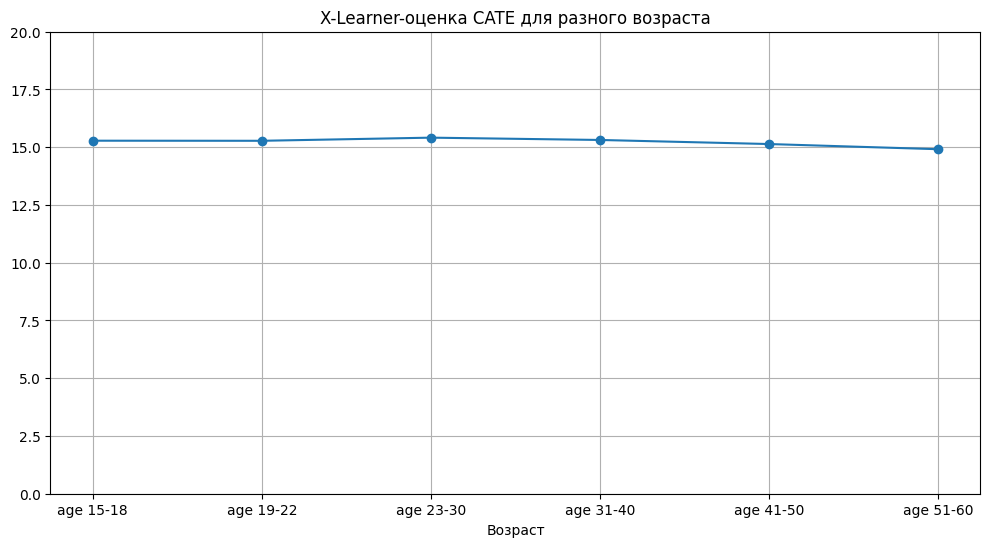

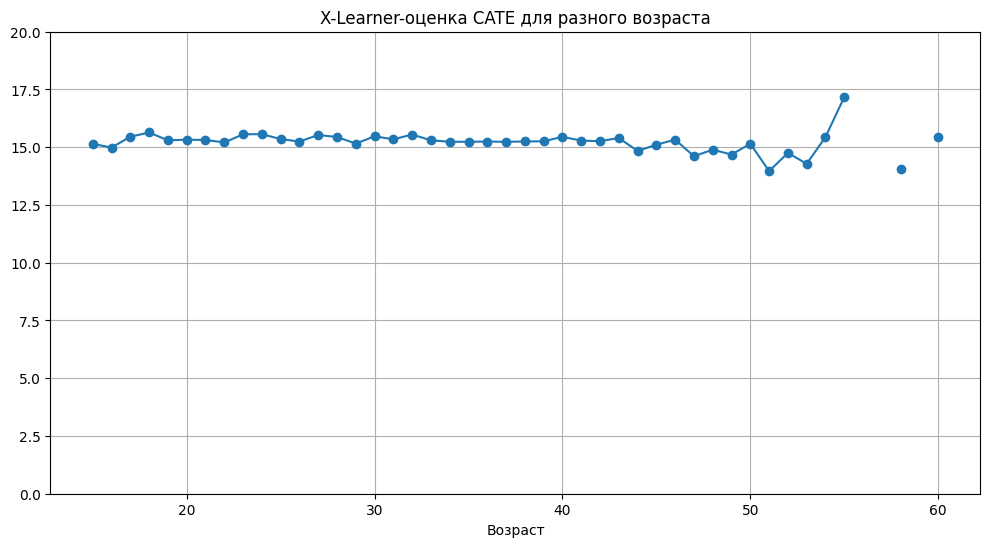

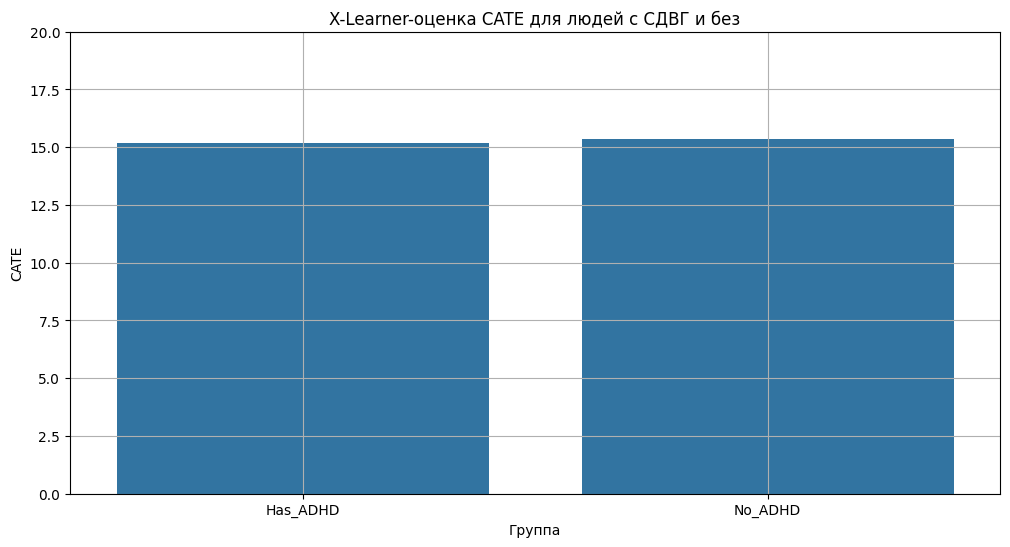

In [253]:
# 5 этап. Оценка CATE

cte_xlearner = (1 - proba_hat_xlearner) * pred_d1_hat_x + proba_hat_xlearner * pred_d0_hat_x

show_cate_by_age_group(X_dml, cte_xlearner, 'X-Learner')

show_cate_by_age(X_dml, cte_xlearner, 'X-Learner')

show_cate_by_adhd(X_dml, cte_xlearner, 'X-Learner')

#### Результаты

In [322]:
X

,higher_edu,adhd,low_focus,text_complexity,age,reads_often,not_tired
0,0,0,1,79.875433,33,1,0
1,0,0,0,57.942059,27,0,0
2,0,0,0,35.177121,25,0,1
3,0,0,0,31.642157,27,1,1
4,0,0,0,78.800967,38,1,1
...,...,...,...,...,...,...,...
4995,1,0,1,52.862177,22,1,0
4996,1,0,0,70.281624,24,0,1
4997,1,0,0,54.913072,31,0,0
4998,0,0,1,39.401695,32,0,1


Mean of empty slice.


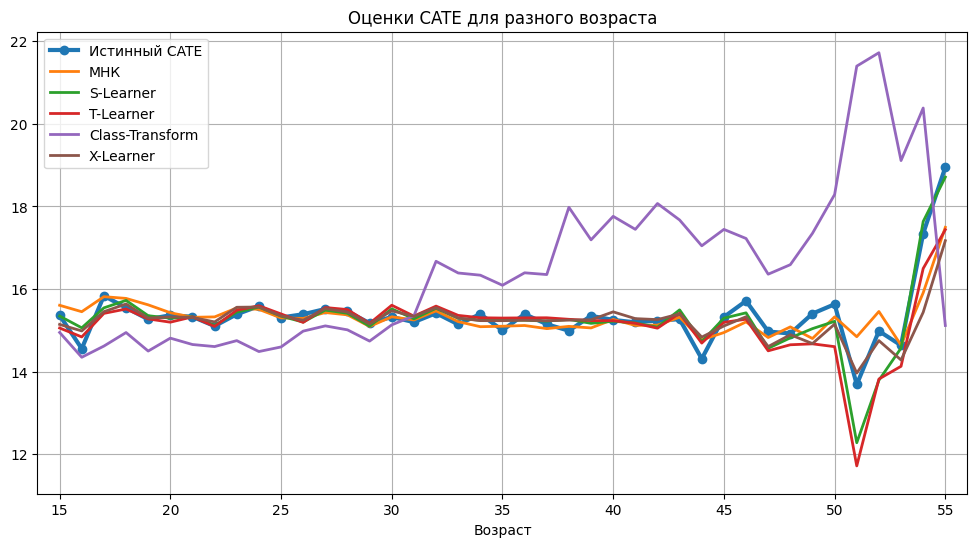

In [294]:
ages = list(range(15, 61))

cate_models = {'Истинный CATE': CATE_true, 'МНК': cate, 'S-Learner': cte_slearner, 'T-Learner': cte_tlearner, 
               'Class-Transform': cte_hat_transform_classes, 'X-Learner': cte_xlearner, }

plt.figure(figsize=(12, 6))
plt.title(f'Оценки CATE для разного возраста')
plt.grid()
plt.xlabel('Возраст')
plt.xlim(xmin=14, xmax=56)

for method, cte in cate_models.items():
    cates_age = []
    
    for age in ages:
        age_mask = X_dml['age'] == age
        cates_age.append(cte[age_mask].mean())

    CATE_by_age = pd.DataFrame({'CATE': cates_age,
                                'age': ages})

    plt.plot(CATE_by_age['age'], CATE_by_age['CATE'], 
             label=f'{method}', 
             lw=3 if method == 'Истинный CATE' else 2,
             marker='o' if method == 'Истинный CATE' else None) 


plt.legend();  

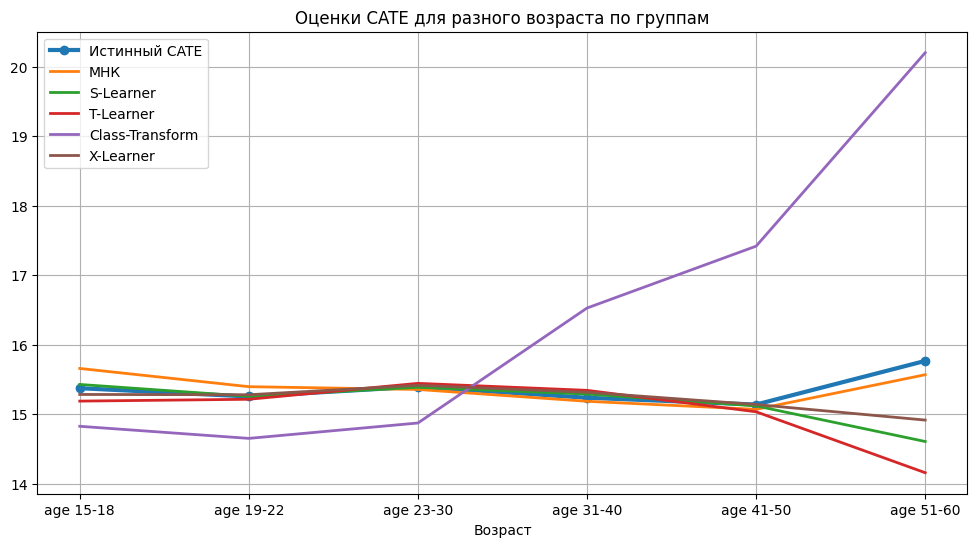

In [309]:
age_groups = {
    'age 15-18': (15 <= X_dml['age']) & (X_dml['age'] <= 18),
    'age 19-22': (19 <= X_dml['age']) & (X_dml['age'] <= 22),
    'age 23-30': (23 <= X_dml['age']) & (X_dml['age'] <= 30),
    'age 31-40': (31 <= X_dml['age']) & (X_dml['age'] <= 40),
    'age 41-50': (41 <= X_dml['age']) & (X_dml['age'] <= 50),
    'age 51-60': (51 <= X_dml['age']),
}

cate_models = {'Истинный CATE': CATE_true, 'МНК': cate, 'S-Learner': cte_slearner, 'T-Learner': cte_tlearner, 
               'Class-Transform': cte_hat_transform_classes, 'X-Learner': cte_xlearner, }

plt.figure(figsize=(12, 6))
plt.title(f'Оценки CATE для разного возраста по группам')
plt.grid()
plt.xlabel('Возраст')

for method, cte in cate_models.items():
    cates_age_groups = []
    age_labels = []
    
    for age_group, mask in age_groups.items():
        cates_age_groups.append(cte[mask].mean())
        age_labels.append(age_group)
    
    plt.plot(age_labels, cates_age_groups, 
             label=method,
             linewidth=3 if method == 'Истинный CATE' else 2,
             marker='o' if method == 'Истинный CATE' else None,)


plt.legend();  

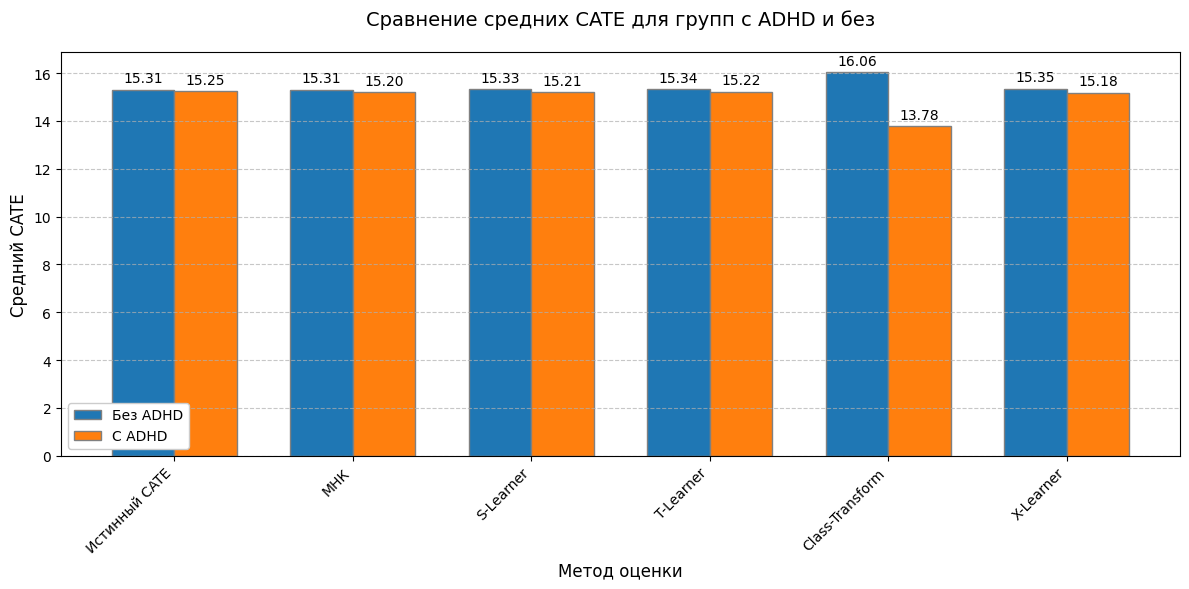

In [323]:
# Создаем DataFrame для удобства
cate_adhd_results = pd.DataFrame(index=cate_models.keys(), columns=['ADHD=0', 'ADHD=1'])

# Считаем средние CATE по группам ADHD
for method, cte in cate_models.items():
    for adhd in [0, 1]:
        mask = (X_dml['adhd'] == adhd)
        cate_adhd_results.loc[method, f'ADHD={adhd}'] = cte[mask].mean()

# Параметры графика
bar_width = 0.35
x = np.arange(len(cate_adhd_results))
colors = ['#1f77b4', '#ff7f0e']  # Синий для без ADHD, оранжевый для ADHD

fig, ax = plt.subplots(figsize=(12, 6))

# Рисуем столбцы
bars1 = ax.bar(x - bar_width/2, cate_adhd_results['ADHD=0'], width=bar_width, 
               color=colors[0], label='Без ADHD', edgecolor='grey')
bars2 = ax.bar(x + bar_width/2, cate_adhd_results['ADHD=1'], width=bar_width, 
               color=colors[1], label='С ADHD', edgecolor='grey')

# Настройки внешнего вида
ax.set_title('Сравнение средних CATE для групп с ADHD и без', fontsize=14, pad=20)
ax.set_xlabel('Метод оценки', fontsize=12)
ax.set_ylabel('Средний CATE', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(cate_adhd_results.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем значения на столбцы
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Смещение текста
                    textcoords="offset points",
                    ha='center', va='bottom')

# Легенда и оформление
ax.legend(framealpha=1)
plt.tight_layout()
plt.show()


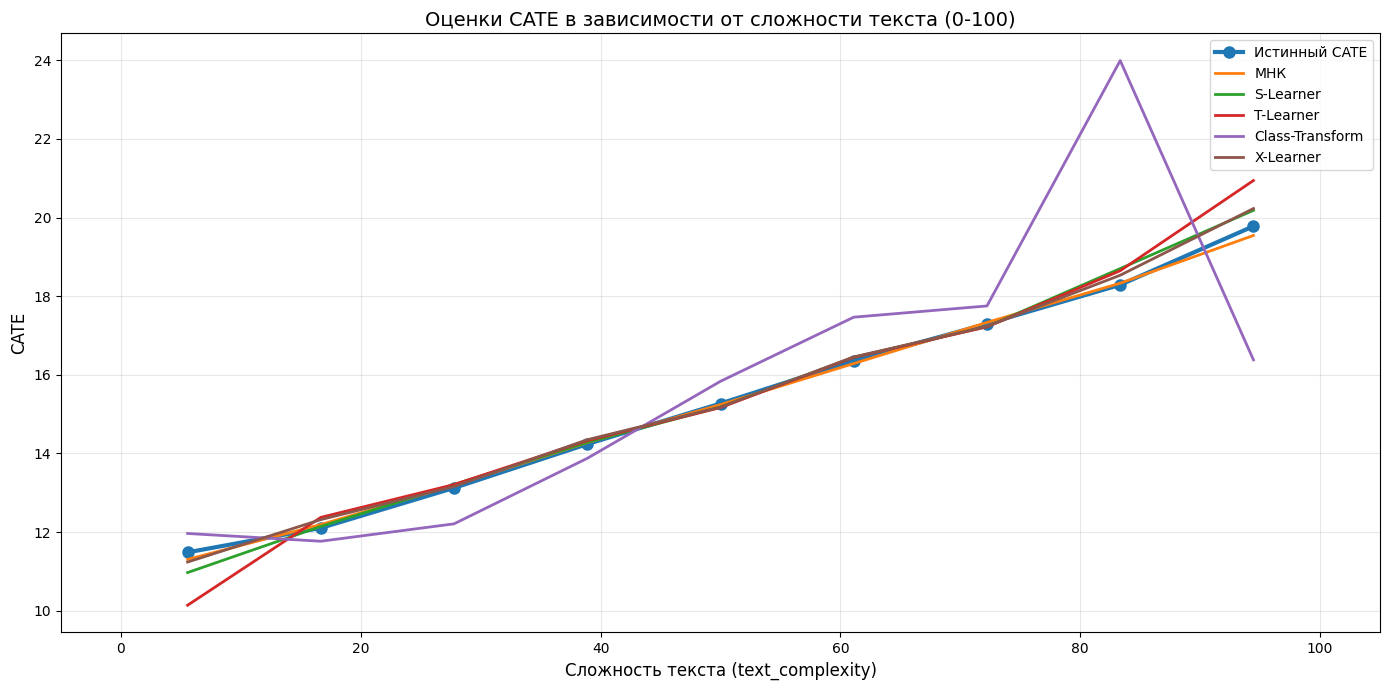

In [330]:
# Создаем равномерные точки по шкале сложности текста (0-100)
complexity_bins = np.linspace(0, 100, 10)  # 20 точек от 0 до 100


plt.figure(figsize=(14, 7))
plt.title('Оценки CATE в зависимости от сложности текста (0-100)', fontsize=14)
plt.xlabel('Сложность текста (text_complexity)', fontsize=12)
plt.ylabel('CATE', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(-5, 105)  # Добавляем небольшие отступы по краям

# Для каждого метода вычисляем средний CATE в бинах сложности текста
for method, cte in cate_models.items():
    cate_values = []
    bin_centers = []
    
    for i in range(len(complexity_bins)-1):
        lower = complexity_bins[i]
        upper = complexity_bins[i+1]
        mask = (X_dml['text_complexity'] >= lower) & (X_dml['text_complexity'] < upper)
        
        if mask.sum() > 0:  # Пропускаем пустые бины
            cate_values.append(cte[mask].mean())
            bin_centers.append((lower + upper)/2)
    
    # Рисуем линию с маркерами для каждого метода
    linewidth = 3 if method == 'Истинный CATE' else 2
    marker = 'o' if method == 'Истинный CATE' else None
    plt.plot(bin_centers, cate_values, 
             label=method,
             linewidth=linewidth,
             marker=marker,
             markersize=8 if method == 'Истинный CATE' else 6)


# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()
plt.tight_layout()
plt.show()


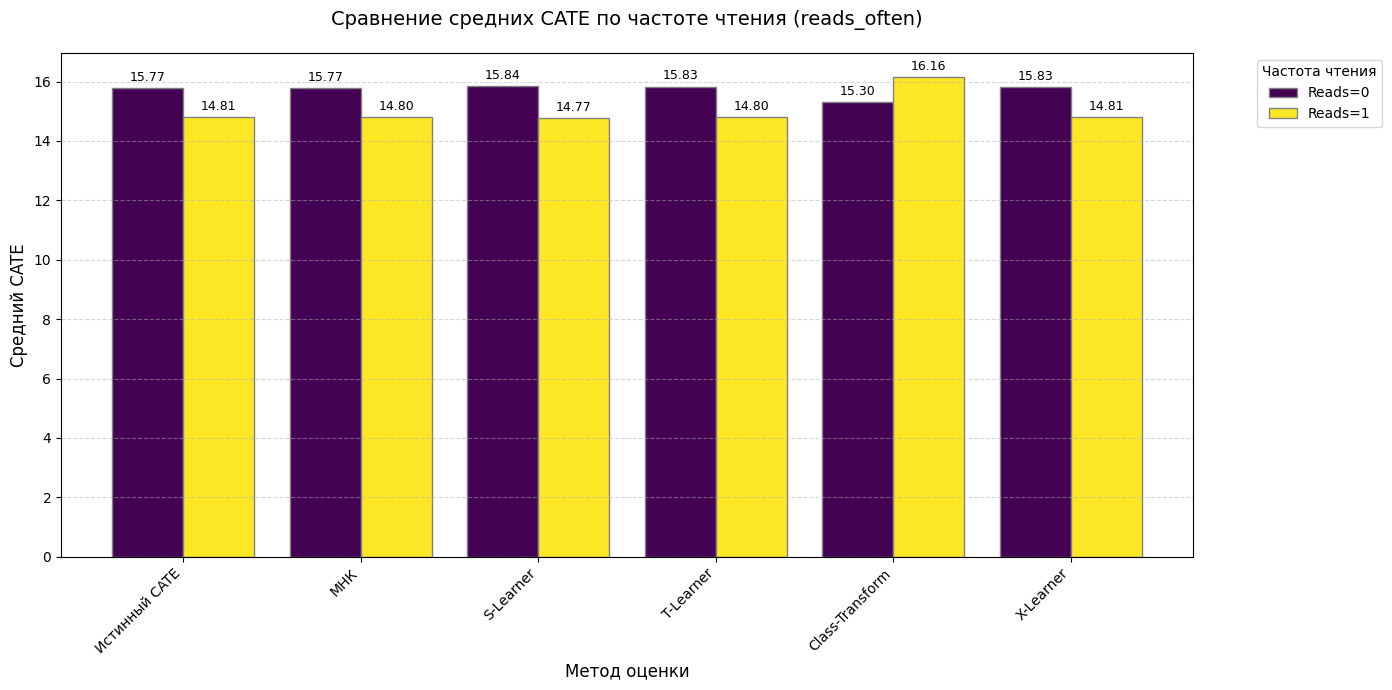

In [339]:
# Создаем DataFrame для удобства
reads_categories = sorted(X_dml['reads_often'].unique())  # Автоматическое определение категорий
reads_often_results = pd.DataFrame(index=cate_models.keys(), columns=[f'Reads={cat}' for cat in reads_categories])

# Считаем средние CATE по группам reads_often
for method, cte in cate_models.items():
    for reads in reads_categories:
        mask = (X_dml['reads_often'] == reads)
        reads_often_results.loc[method, f'Reads={reads}'] = cte[mask].mean()

# Параметры графика
n_methods = len(reads_often_results)
n_categories = len(reads_categories)
bar_width = 0.8 / n_categories  # Автоподбор ширины столбцов
x = np.arange(n_methods)

# Цветовая палитра (можно изменить)
colors = plt.cm.viridis(np.linspace(0, 1, n_categories))  # Альтернатива: ['#1f77b4', '#ff7f0e', '#2ca02c']

fig, ax = plt.subplots(figsize=(14, 7))

# Рисуем столбцы для каждой категории чтения
for i, reads in enumerate(reads_categories):
    bars = ax.bar(x + i*bar_width, reads_often_results[f'Reads={reads}'], 
                 width=bar_width, color=colors[i],
                 label=f'Reads={reads}', edgecolor='grey')

    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                   xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom', fontsize=9)

# Настройки внешнего вида
ax.set_title('Сравнение средних CATE по частоте чтения (reads_often)', fontsize=14, pad=20)
ax.set_xlabel('Метод оценки', fontsize=12)
ax.set_ylabel('Средний CATE', fontsize=12)
ax.set_xticks(x + bar_width*(n_categories-1)/2)
ax.set_xticklabels(reads_often_results.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Легенда и оформление
ax.legend(title='Частота чтения', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### Мотивирован ли тут метод X-Learner?

X-Learner решает проблему отсутствия достаточного количества наблюдений в группе воздействия

В нашей выборке ситуация обстоит так:

In [126]:
# Доля группы воздействия в целом по выборке

T_dml.mean()

0.3082

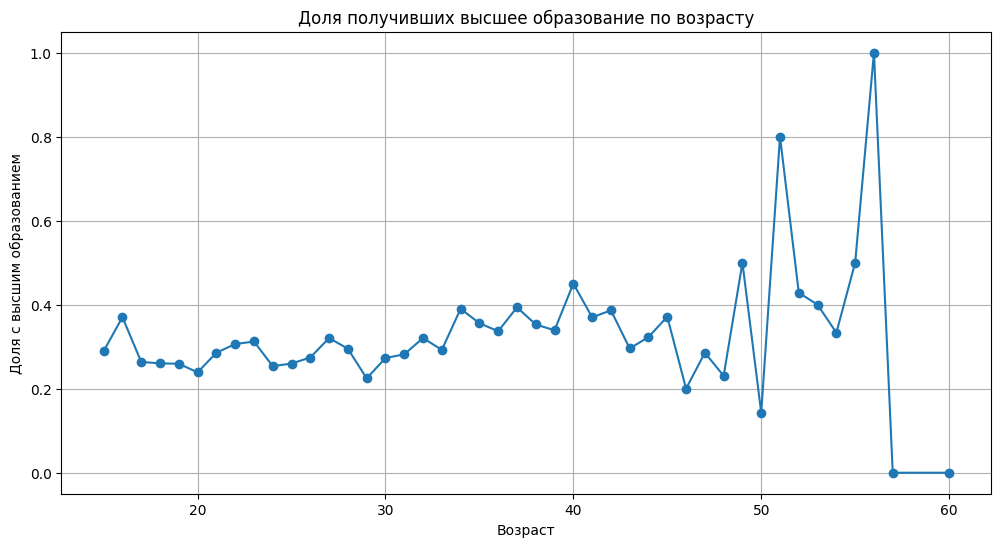

In [127]:
# Доля группы воздействия в разрезе по возрасту

plt.figure(figsize=(12, 6))

plt.title('Доля получивших высшее образование по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Доля с высшим образованием')

plt.plot(df.groupby('age').agg({'higher_edu': 'mean'}),
         marker='o')

plt.grid();

Видим, что группа воздействия почти по всем возрастам меньше половины - около 30%, но это все-таки не так мало. Поэтому метод X-Learner тут не обязателен, но тоже не помешал

#### Как использовать в государственной внутренней политике

Если мы знаем как на понимание текста влияет высшее образование в разрезе по возрастным группам, то можем предлагать группам с наибольшим потенциалом пройти курсы повышения квалификации или магистратуру - таким образом мы можем тратить субсидии на наиболее перспективных студентов, а не тех, кому получение образования принесет меньше. Это поможет оптимизировать бюджет, а таким индивидам даже улучшить эффект, создавая учебную среду из тех, кому реально поможет образование

### 7. Выберите лучшую модель оценивания условных средних эффектов воздействия, используя:
- истинные значения условных средних эффектов воздействия.
- прогнозную точность моделей.
- псевдоисходы.

Проинтерпретируйте различия в результатах различных подходов.

#### Сравнение по истинным значениям CATE

In [314]:
def get_mse_for_cate_true(CATE_true, CATE_hat):

    result = np.mean((CATE_true - CATE_hat) ** 2)
    return result


mse_versus_true_CATE = pd.DataFrame()

mse_versus_true_CATE.loc['МНК', 'MSE'] = get_mse_for_cate_true(CATE_true, cate)
mse_versus_true_CATE.loc['S-Learner', 'MSE'] = get_mse_for_cate_true(CATE_true, cte_slearner)
mse_versus_true_CATE.loc['T-Learner', 'MSE'] = get_mse_for_cate_true(CATE_true, cte_tlearner)
mse_versus_true_CATE.loc['Transform-Classes', 'MSE'] = get_mse_for_cate_true(CATE_true, cte_hat_transform_classes)
mse_versus_true_CATE.loc['X-Learner', 'MSE'] = get_mse_for_cate_true(CATE_true, cte_xlearner)

mse_versus_true_CATE.sort_values(by='MSE')

,MSE
T-Learner,3.589852
S-Learner,3.618338
X-Learner,3.781619
МНК,4.020943
Transform-Classes,17.604981


#### Сравнение по прогнозной точности моделей

Модели можно сравнивать по MSE:

$$MSE = \cfrac{1}{n} \mathcal{\sum} (y_i - \hat{E}[y_i | X_i, H_i])^2 $$ 

Но модель которая точно оценивает $E[y_i | X_i, H_i]$ не обязательно лучше оценивает CATE. Оценки $E[y_i | X_i, H_i = 1]$ и $E[y_i | X_i, H_i = 0]$ могут быть смещенными, но елси они имеют одинаковое смещение, то их разность будет давать достаточно точный CATE.

In [315]:
def get_mse_for_prognose_power_cate(y, y_hat_1, y_hat_0, treated_mask=treated_mask):
    y_hat = np.zeros(shape=y.shape[0])

    try:
        y_hat[treated_mask] = y_hat_1[treated_mask]
        y_hat[~treated_mask] = y_hat_0[~treated_mask]
    except:
        y_hat[treated_mask] = y_hat_1
        y_hat[~treated_mask] = y_hat_0

    result = np.mean((y - y_hat) ** 2)
    return result

In [316]:
mse_prognose_power_df = pd.DataFrame()

# mse_prognose_power_df.loc['МНК', 'MSE*'] = get_mse_for_cate(cate, y_pseudo_for_transform_classes)
mse_prognose_power_df.loc['S-Learner', 'MSE'] = get_mse_for_prognose_power_cate(y_dml, y_1_slearner, y_0_slearner)
mse_prognose_power_df.loc['T-Learner', 'MSE'] = get_mse_for_prognose_power_cate(y_dml, y_pred_tlearner_1, y_pred_tlearner_0)
# mse_prognose_power_df.loc['Transform-Classes', 'MSE'] = get_mse_for_prognose_power_cate(cte_hat_transform_classes, y_pseudo_for_transform_classes)
mse_prognose_power_df.loc['X-Learner', 'MSE'] = get_mse_for_prognose_power_cate(y_dml, y_xlearner_0, y_xlearner_1)

mse_prognose_power_df.sort_values(by='MSE')

,MSE
T-Learner,1.217760
S-Learner,1.237074
X-Learner,239.816065


#### Сравнение по псевдоисходам

Берется оценка $y_i^* = y_i * (\cfrac{T_i}{P(T_i = 1 | X_i)} - \cfrac{1 - T_i}{1 - P(T_i = 1 | X_i)})$ из метода трансформации классов

И считается $MSE^* = \cfrac{1}{n}\sum_{i=1}^n(\hat{y}_i^* - \hat{CATE_i})^2$

In [317]:
def get_mse_for_cate(cte, y_pseudo):
    result = np.mean((cte - y_pseudo) ** 2)
    return result 

In [318]:
mse_cate_df = pd.DataFrame()

mse_cate_df.loc['МНК', 'MSE*'] = get_mse_for_cate(cate, y_pseudo_for_transform_classes)
mse_cate_df.loc['S-Learner', 'MSE*'] = get_mse_for_cate(cte_slearner, y_pseudo_for_transform_classes)
mse_cate_df.loc['T-Learner', 'MSE*'] = get_mse_for_cate(cte_tlearner, y_pseudo_for_transform_classes)
mse_cate_df.loc['Transform-Classes', 'MSE*'] = get_mse_for_cate(cte_hat_transform_classes, y_pseudo_for_transform_classes)
mse_cate_df.loc['X-Learner', 'MSE*'] = get_mse_for_cate(cte_xlearner, y_pseudo_for_transform_classes)

mse_cate_df.sort_values(by='MSE*')

,MSE*
Transform-Classes,10466.806338
МНК,10592.233235
X-Learner,10592.343731
S-Learner,10593.627952
T-Learner,10594.184002


In [319]:
mse_cate_by_age_group_df = pd.DataFrame()

age_groups = {
    'age 15-18': (15 <= X_dml['age']) & (X_dml['age'] <= 18),
    'age 19-22': (19 <= X_dml['age']) & (X_dml['age'] <= 22),
    'age 23-30': (23 <= X_dml['age']) & (X_dml['age'] <= 30),
    'age 31-40': (31 <= X_dml['age']) & (X_dml['age'] <= 40),
    'age 41-50': (41 <= X_dml['age']) & (X_dml['age'] <= 50),
    'age 51-60': (51 <= X_dml['age']),
}

for age_group, mask in age_groups.items():
    mse_cate_by_age_group_df.loc['МНК', f'{age_group} MSE*'] = get_mse_for_cate(cate[mask], y_pseudo_for_transform_classes[mask])
    mse_cate_by_age_group_df.loc['S-Learner', f'{age_group} MSE*'] = get_mse_for_cate(cte_slearner[mask], y_pseudo_for_transform_classes[mask])
    mse_cate_by_age_group_df.loc['T-Learner', f'{age_group} MSE*'] = get_mse_for_cate(cte_tlearner[mask], y_pseudo_for_transform_classes[mask])
    mse_cate_by_age_group_df.loc['Transform-Classes', f'{age_group} MSE*'] = get_mse_for_cate(cte_hat_transform_classes[mask], y_pseudo_for_transform_classes[mask])
    mse_cate_by_age_group_df.loc['X-Learner', f'{age_group} MSE*'] = get_mse_for_cate(cte_xlearner[mask], y_pseudo_for_transform_classes[mask])

mse_cate_by_age_group_df.sort_values(by='age 23-30 MSE*')

,age 15-18 MSE*,age 19-22 MSE*,age 23-30 MSE*,age 31-40 MSE*,age 41-50 MSE*,age 51-60 MSE*
Transform-Classes,10067.459136,10277.291502,10616.961715,10546.898936,10157.203339,8437.478704
S-Learner,10291.529352,10354.651798,10711.462892,10679.786179,10318.856025,9240.959249
T-Learner,10291.815764,10353.425842,10712.804888,10680.262051,10319.066482,9231.298317
МНК,10241.678767,10346.876078,10724.377755,10691.562721,10270.701508,8847.618382
X-Learner,10249.936216,10340.920497,10725.238770,10689.943516,10270.711620,8917.336169


Метод трансформации классов оказался лучшим по MSE*. Логично, ведь в этом методе модель учится предсказывать именно псевдоисходы

#### Итог

Метод T-Learner лучше всех справляется с предсказанием CATE по всем методологиям оценивания качества методов:

- В сравнении с истинным CATE - 1 место с отрывом
- В сравнении по прогнозной точности моделей - 1 место
- В сравнении по псевдоисходам - 3 место, но метод трансформации классов (1 место) плохо показывает себя при визуальном анализе и на других способах оценки, а S-Learner (2 место) имеет очень похожий результат по этой оценке
- Визуальный анализ: T-Learner довольно хорошо и стабильно предсказывает истинный CATE наряду с другими методами

### 8. Оцените средние эффекты воздействия и локальные средние эффекты воздействия используя худшие из обученных классификационных и регрессионных моделей. 
Сопоставьте результаты с теми, что были получены с помощью лучших моделей. Сдеайте вывод об устойчивости результатов к качеству используемых методов машинного обучения.

In [321]:
ATE_hat_df

,ATE_hat
Истинный ATE,15.298416
Оценка МНК,15.291983
Метод условных Мат. ожиданий (Лучшая модель),15.293036
Метод условных Мат. ожиданий (Худшая модель),16.179249
Метод взвешенных обратных вероятностей (Лучшая модель),15.336323
Метод взвешенных обратных вероятностей (Худшая модель),15.347317
Метод двойной устойчивости (Лучшие модели),15.293306
Метод двойной устойчивости (Худшие модели),15.551129
Метод Double ML (Лучшие модели),15.238318
Метод Double ML (Худшие модели),15.312427


In [320]:
late_hat_df

,LATE_hat
Истинный LATE,15.333905
DML без инструмента (лучшие модели),15.238318
DML без инструмента (худише модели),15.312427
DML с инструментом,15.360620


### 9. Резюмируйте ключевые выводы проведенного в данном разделе анализа.

- Получение высшего образования в целом положительно влияет на результат смыслового пересказа текста
- В среднем получение образование дает +15 из 100 пунктов на тесте
- Для группы индивидов, которые всегда выбирают идти учиться, если живут в регионе с вузом и не идут учиться, если живут далеко от вуза - эффект примерно такой же, как и в среднем
- Дополнительные баллы на тесте со смысловым пересказом индивиды получают в разном размере, о чем говорит распределение CATE
- Различные методы довольно хорошо показывают себя 